
LOGISTIC REGRESSION MODEL

Lead scoring Case Study

Problem Statement: In this notebook, we will build a binary classification model to predict potential leads dataset by calculating lead score which will accelerate the company's revenue.
Essentially, X Education Company wants to know potential customers who are likely to be converted into hot leads.

Based on survey they got Lead scoring dataset, converted is target variable with binary data

The equation found on Logistic Regression Model, converted=-1.884+(1.177TotalVisits')+(1.177'Total Time Spent on Website')+(4.69'Lead Source_Olark Chat')+(1.566 'Lead Source_Reference')+(4.111'Lead Source_Welingak Website')+(5.821'Last Activity_Olark Chat Conversation')+(-0.869'Last Activity_Others')+(-0.722'Specialization_Travel and Tourism')+(2.096'What is your current occupation_Working Professional')+(-1.748'What matters most to you in choosing a course_Other')+(-4.570'Tags_Ringing')+(1.864'Last Notable Activity_SMS Sent'))


In [1]:
# Importing necessory libraries
import numpy as np
import pandas as pd
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#Model Building libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [277]:
# Readthe Data
lead_df=pd.read_csv("Leads.csv")


In [278]:
# Check the head of the dataset
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [279]:
lead_df.shape

(9240, 37)

In [280]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [281]:
#Check duplicate rows in a DataFrame
lead_df.duplicated().any()

False

In [282]:
percent=round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending=False)
total=lead_df.isnull().sum().sort_values(ascending=False)
pd.concat([percent,total],axis=1,keys=['Percent','Total'])

Percent  Total
Lead Quality                                     51.59   4767
Asymmetrique Activity Index                      45.65   4218
Asymmetrique Profile Score                       45.65   4218
Asymmetrique Activity Score                      45.65   4218
Asymmetrique Profile Index                       45.65   4218
Tags                                             36.29   3353
Lead Profile                                     29.32   2709
What matters most to you in choosing a course    29.32   2709
What is your current occupation                  29.11   2690
Country                                          26.63   2461
How did you hear about X Education               23.89   2207
Specialization                                   15.56   1438
City                                             15.37   1420
Page Views Per Visit                              1.48    137
TotalVisits                                       1.48    137
Last Activity                                     1.11    103
Lead Source                                       0.39     36
Receive More Updates About Our Courses            0.00      0
I agree to pay the amount through cheque          0.00      0
Get updates on DM Content                         0.00      0
Update me on Supply Chain Content                 0.00      0
A free copy of Mastering The Interview            0.00      0
Prospect ID                                       0.00      0
Newspaper Article                                 0.00      0
Through Recommendations                           0.00      0
Digital Advertisement                             0.00      0
Newspaper                                         0.00      0
X Education Forums                                0.00      0
Lead Number                                       0.00      0
Magazine                                          0.00      0
Search                                            0.00      0
Total Time Spent on Website                       0.00      0
Converted                                         0.00      0
Do Not Call                                       0.00      0
Do Not Email                                      0.00      0
Lead Origin                                       0.00      0
Last Notable Activity                             0.00      0

In [283]:
#Handle Select value present in many categorical Variable by replacing 'Select' with NaN
lead_df.replace({'Select': np.nan}, inplace = True)

In [284]:
# Checking the missing percenetage
percent=round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending=False)
total=lead_df.isnull().sum().sort_values(ascending=False)
pd.concat([percent,total],axis=1,keys=['Percent','Total'])

Percent  Total
How did you hear about X Education               78.46   7250
Lead Profile                                     74.19   6855
Lead Quality                                     51.59   4767
Asymmetrique Profile Score                       45.65   4218
Asymmetrique Activity Score                      45.65   4218
Asymmetrique Activity Index                      45.65   4218
Asymmetrique Profile Index                       45.65   4218
City                                             39.71   3669
Specialization                                   36.58   3380
Tags                                             36.29   3353
What matters most to you in choosing a course    29.32   2709
What is your current occupation                  29.11   2690
Country                                          26.63   2461
Page Views Per Visit                              1.48    137
TotalVisits                                       1.48    137
Last Activity                                     1.11    103
Lead Source                                       0.39     36
Receive More Updates About Our Courses            0.00      0
I agree to pay the amount through cheque          0.00      0
Get updates on DM Content                         0.00      0
Update me on Supply Chain Content                 0.00      0
A free copy of Mastering The Interview            0.00      0
Prospect ID                                       0.00      0
Newspaper Article                                 0.00      0
Through Recommendations                           0.00      0
Digital Advertisement                             0.00      0
Newspaper                                         0.00      0
X Education Forums                                0.00      0
Lead Number                                       0.00      0
Magazine                                          0.00      0
Search                                            0.00      0
Total Time Spent on Website                       0.00      0
Converted                                         0.00      0
Do Not Call                                       0.00      0
Do Not Email                                      0.00      0
Lead Origin                                       0.00      0
Last Notable Activity                             0.00      0

In [285]:
#Removing columns  Lead Number,Prospect ID  as it doesnt add much value for further analysis
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [286]:
lead_df.shape

(9240, 35)

In [287]:
# #Deleting 30% missing columns at once by passing the thresh to drop na
missing_data_col=len(lead_df)*0.6
df=lead_df.dropna(thresh=missing_data_col,axis=1)

In [288]:
df.shape

(9240, 28)

In [289]:
# Display coumns with only missing values along with their percentage
x=(df.isnull().sum()/df.shape[0]*100)
x[x > 0].sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [290]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())

    print('***********************************************************')


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
***********************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
***********************************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
*****************************************************

In [46]:
# check data skewness  If the mean is greater than the median, then the distribution is said to be positively skewed. If the mean is less than the median, then the distribution is said to be negatively skewed.
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [47]:
df.describe(include='all')

Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit Last Activity Country  ... Digital Advertisement  \
count            9103.000000          9137    6779  ...                  9240   
unique                   NaN            17      38  ...                     2   
top                      NaN  Email Opened   India  ...                    No   
freq                     NaN          3437    6492  ...                  9236   
mean                2.362820           NaN     NaN  ...                   NaN   
std                 2.161418           NaN     NaN  ...                   NaN   
min                 0.000000           NaN     NaN  ...                   NaN   
25%                 1.000000           NaN     NaN  ...                   NaN   
50%                 2.000000           NaN     NaN  ...                   NaN   
75%                 3.000000           NaN     NaN  ...                   NaN   
max                55.000000           NaN     NaN  ...                   NaN   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   
mean                       NaN                                    NaN   
std                        NaN                                    NaN   
min                        NaN                                    NaN   
25%                        NaN                                    NaN   
50%                        NaN                                    NaN   
75%                        NaN                                    NaN   
max                        NaN                                    NaN   

                                       Tags Update me on Supply Chain Content  \
count                                  5887                              9240   
unique                                   26                                 1   
top     Will revert after reading the email                                No   
freq                                   2072                              9240   
mean                                    NaN                               NaN   
std                                   

Values by absolute number
 0    5679
1    3561
Name: Converted, dtype: int64
Values by %
 0    61.461039
1    38.538961
Name: Converted, dtype: float64


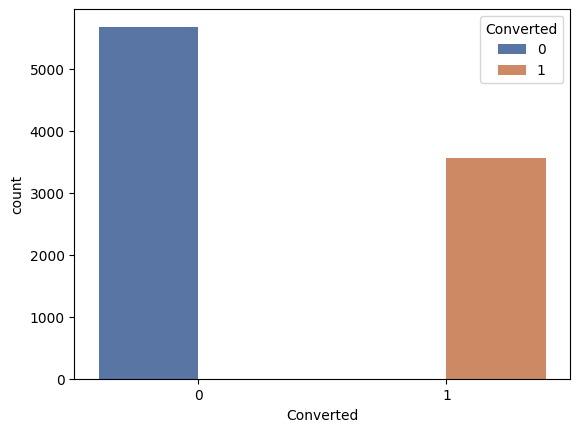

In [307]:
print("Values by absolute number\n",df['Converted'].value_counts())
print("Values by %\n",df['Converted'].value_counts(normalize=True) * 100)
# s = df['Converted'].value_counts(normalize=True) * 100
# s.plot.bar();

sns.countplot(x = df['Converted'], hue = df['Converted'], palette = 'deep');

In [48]:
def hue_count(x, y, p = 'deep'):
    ax = sns.countplot(x = df[x], hue = df[y], palette = p)
    ax.set_title('"{}" Composition'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

In [58]:
# Conversion Rate = (Number of Conversions / Total number of Leads) * 100
def conversion_rate_plot(x, y = 'Converted', p = 'deep'):
    ax = sns.barplot(x = df[x], y = df[y], palette = p)
    ax.set_title('Conversion Rate'.format(y,x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Rate', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    for k in ax.patches:
        ax.annotate('{:.1f} %'.format(k.get_height()*100),(k.get_x()+0.25, k.get_height()))

Handling missing values

Inspect Categoical column


In [50]:

print("null vales",100*df.City.isnull().sum()/len(df.City))

null vales 39.70779220779221


In [51]:
df['City_new']=np.where(df['City'].isin(['Mumbai','Thane & Outskirts']),df['City'],'Others Metro Cities')

In [52]:
print(100*df.City.value_counts(normalize=True))
df.drop('City',axis=1,inplace=True)

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64


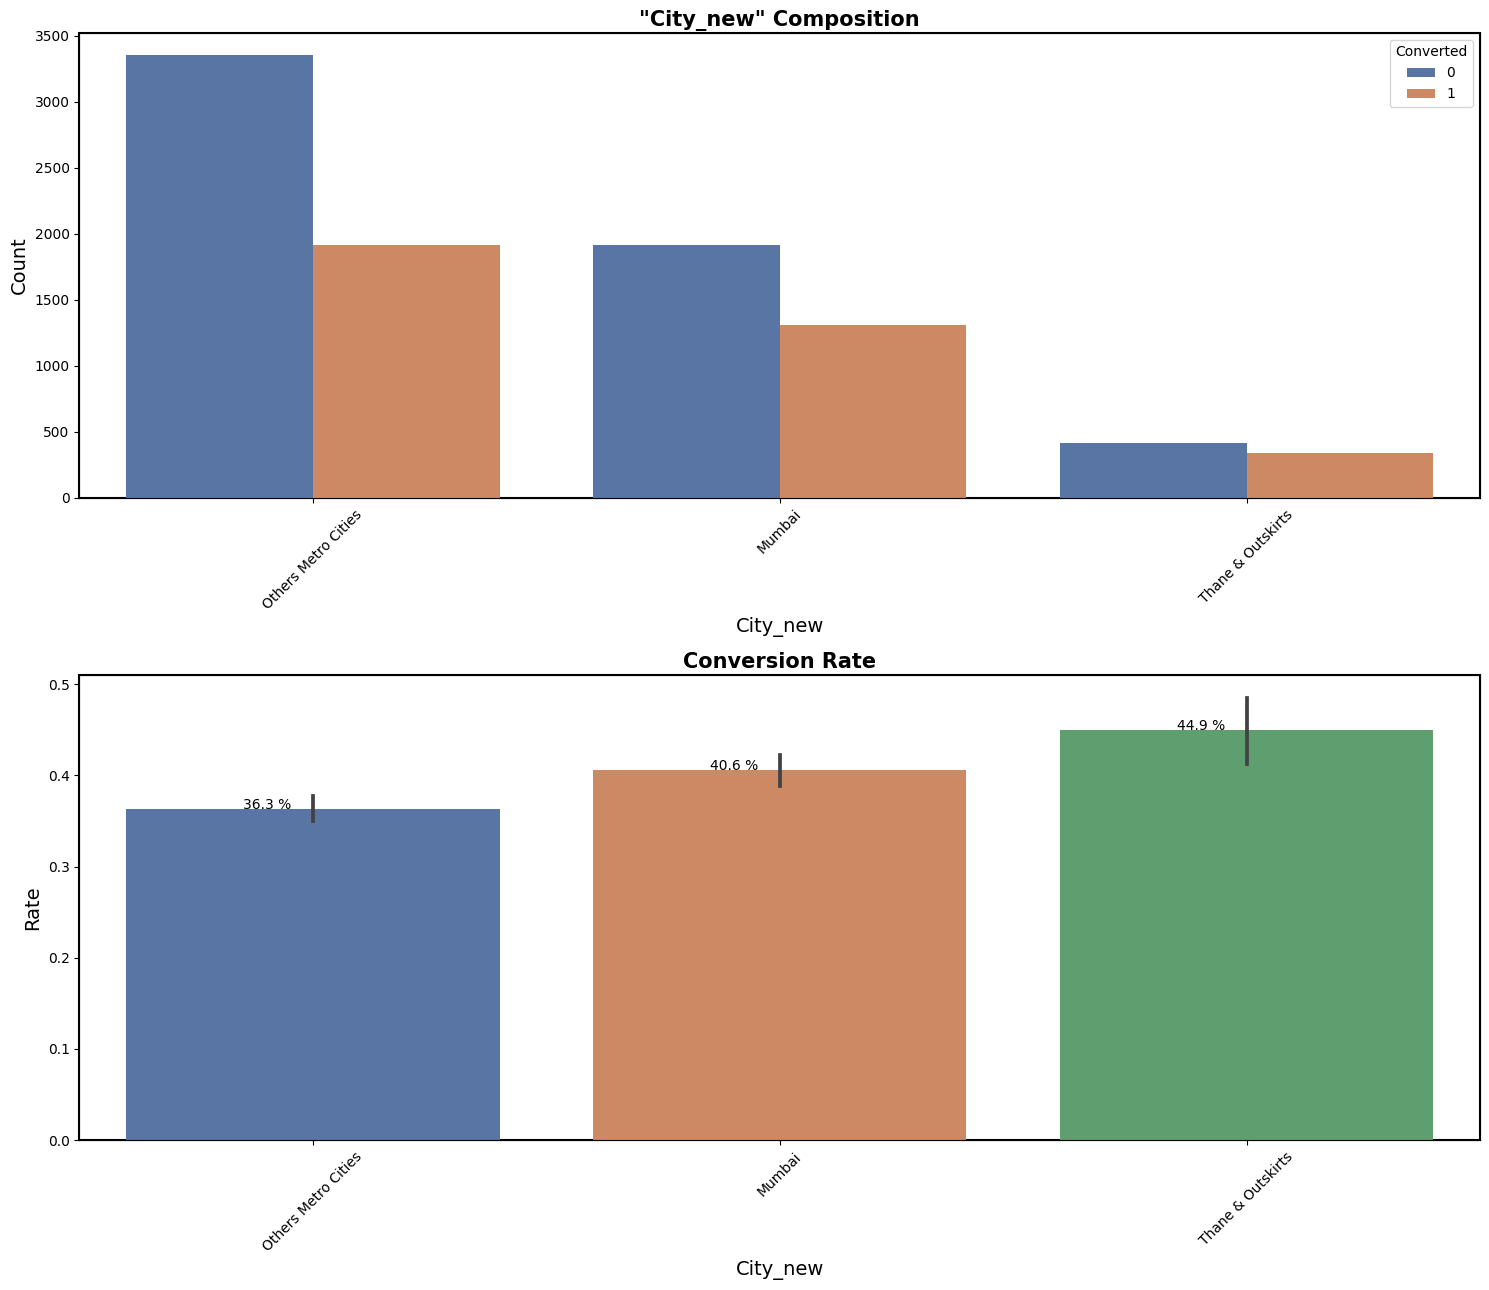

In [59]:
# Count plot
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count(x = 'City_new', y = 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('City_new')
plt.xticks(rotation = 45)

plt.tight_layout()

Specialization

In [60]:
print("Null values",100*df.Specialization.isnull().sum()/len(df.Specialization))
print("------------------------")
print(100*df.Specialization.value_counts(normalize=True))
print("------------------------")
print(df.Specialization.mode()[0])
df.Specialization.fillna("Others",inplace=True)





Null values 36.58008658008658
------------------------
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64
------------------------
Finance Management


In [61]:
#combining less frequent levels into one, 'Others'
x = 100*df['Specialization'].value_counts(normalize = True)
df['Specialization'] = df['Specialization'].replace(list(x[x < 2].index), 'Others')

df['Specialization'].value_counts(normalize = True).mul(100).round(2)


Others                               45.60
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
Name: Specialization, dtype: float64

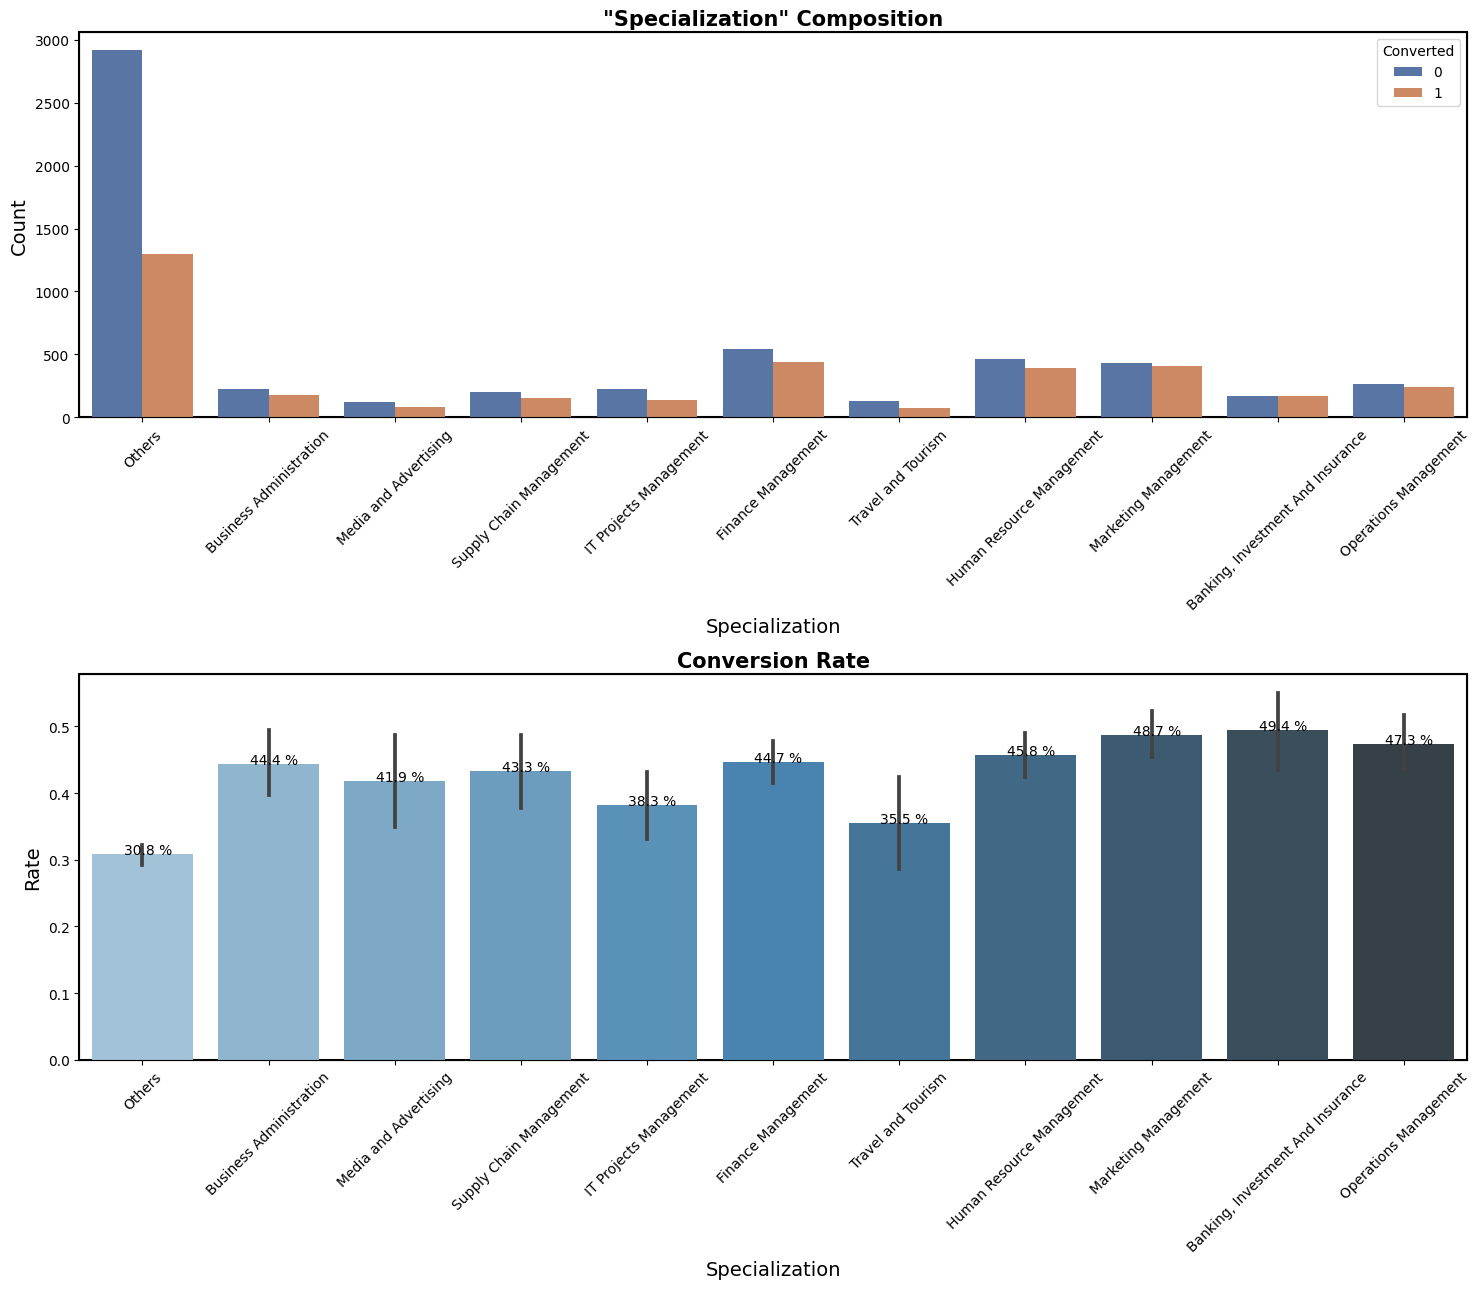

In [62]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Specialization', 'Converted')
plt.xticks(rotation = 45)
# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Specialization', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

Analysis:Leads from Management sector, like Business administration,operation mgmt, HR and Marketing Management, and Banking, Investment and Insurance specialization,supply chain mgmt,finance mgmt are relatively more likely to convert. Their average conversion rate is higher than the overall average. These groups can be targettd more.

Tags

In [63]:
print(100*df.Tags.value_counts(normalize=True))
print("--------------------------------")
print("null values", df.Tags.isnull().sum())

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [64]:
# fill the missing values with mode value of Tags.
df.Tags.fillna(df.Tags.mode()[0],inplace=True)
100*df.Tags.value_counts(normalize=True)


Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [65]:
 #combining less frequent levels into one, 'Others'
x = 100*df['Tags'].value_counts(normalize = True)
df['Tags'] = df['Tags'].replace(list(x[x < 6].index), 'Not intersted')

In [66]:
100*df.Tags.value_counts(normalize=True)

Will revert after reading the email    58.712121
Not intersted                          28.268398
Ringing                                13.019481
Name: Tags, dtype: float64

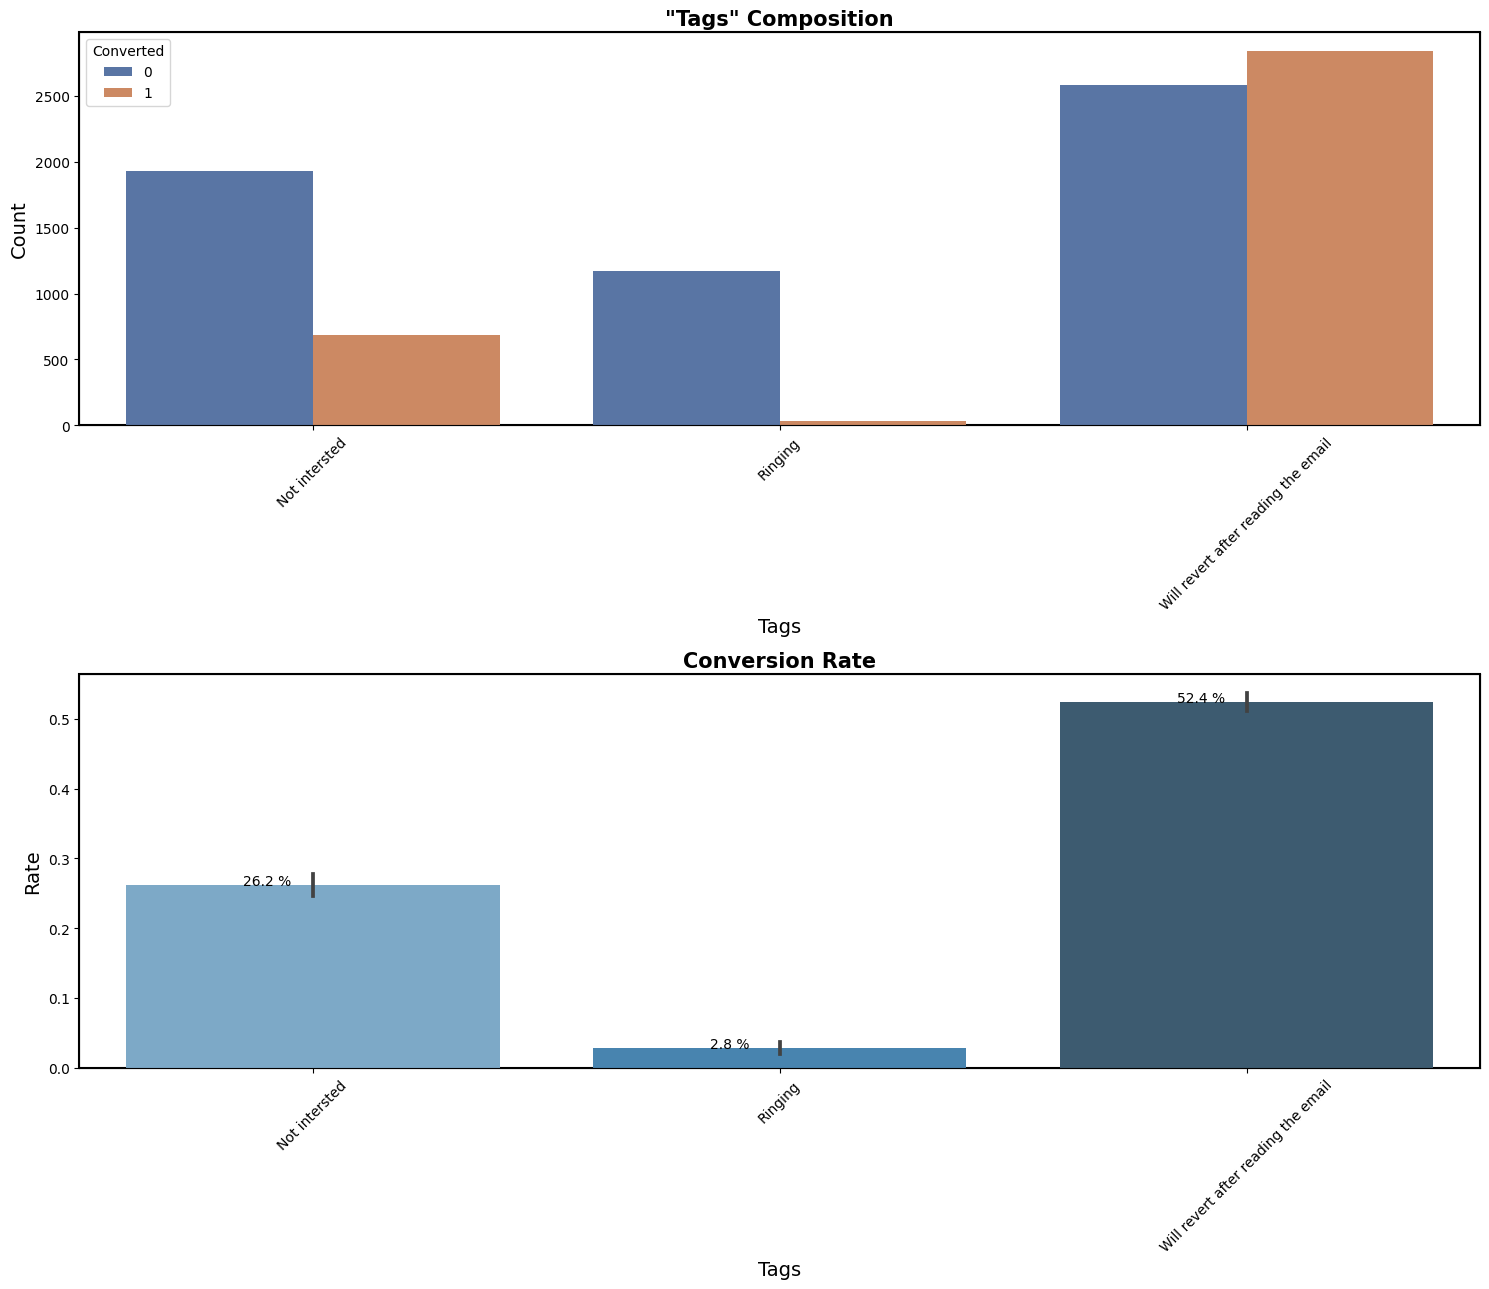

In [67]:
 plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Tags', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Tags', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

Analysis:Customer with current status "Will revert after reading the email" have moderatly high chance of converting compared to others falling in this group

What matters most to you in choosing a course

In [68]:
print("null values",df['What matters most to you in choosing a course'].isnull().sum()/len(df['What matters most to you in choosing a course']))
print(100*df['What matters most to you in choosing a course'].value_counts(normalize=True))

null values 0.29318181818181815
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64


In [69]:
df['What matters most to you in choosing a course'].fillna("Other",inplace=True)
df['What matters most to you in choosing a course'].replace(to_replace="Flexibility & Convenience", value='Better Career Prospects', inplace=True)


In [70]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects    6530
Other                      2710
Name: What matters most to you in choosing a course, dtype: int64

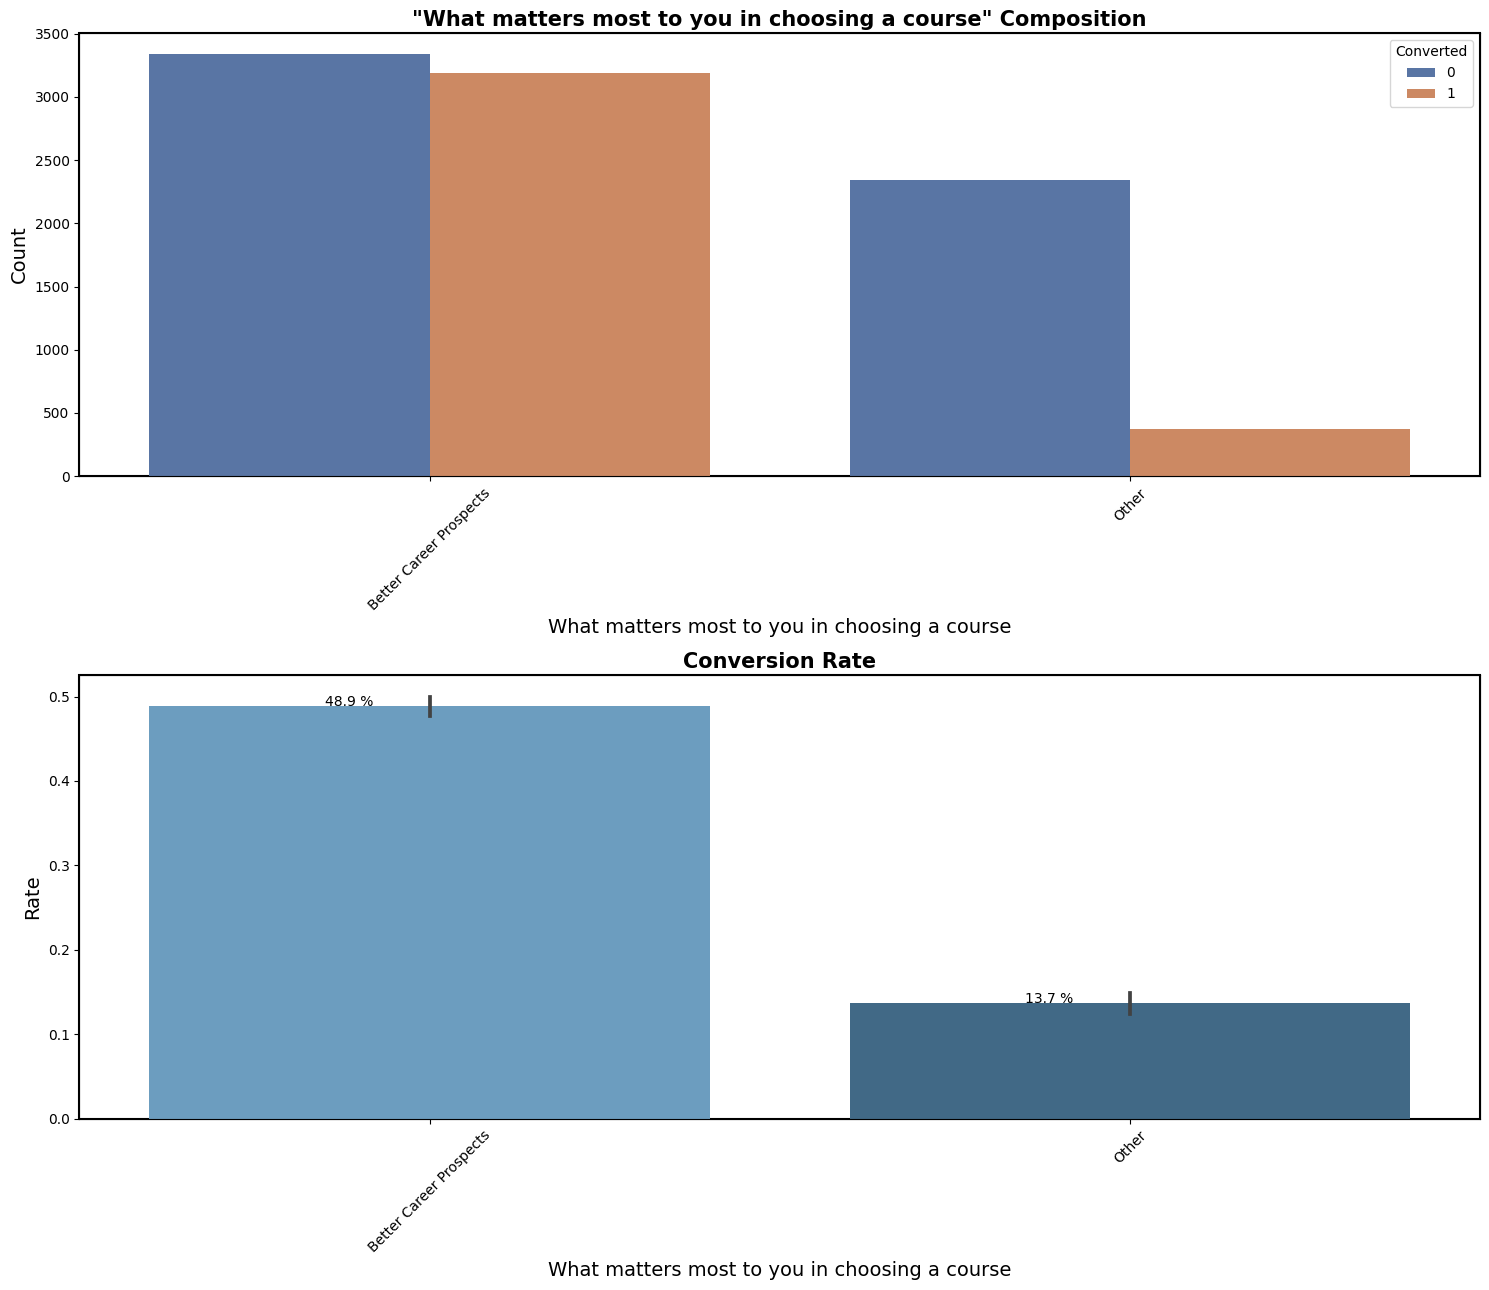

In [71]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('What matters most to you in choosing a course', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('What matters most to you in choosing a course', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()


Analysis:customer aspiring "Better career Prospect"  are likely to be converted.Should target this type of customers

What is your current occupation

In [72]:
print("null values",df['What is your current occupation'].isnull().sum()/len(df['What is your current occupation']))
print("-----------------------------------------------")
print(100*df['What is your current occupation'].value_counts(normalize=True))


null values 0.2911255411255411
-----------------------------------------------
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64


In [73]:
#imputing culumn with mode, 'Unemployed'
df['What is your current occupation'].fillna('Unemployed', inplace = True)


In [74]:
x = 100*df['What is your current occupation'].value_counts(normalize = True)
df['What is your current occupation'] =df['What is your current occupation'].replace(list(x[x < 4].index), 'Other')
print(100*df['What is your current occupation'].value_counts(normalize=True))


Unemployed              89.718615
Working Professional     7.640693
Other                    2.640693
Name: What is your current occupation, dtype: float64


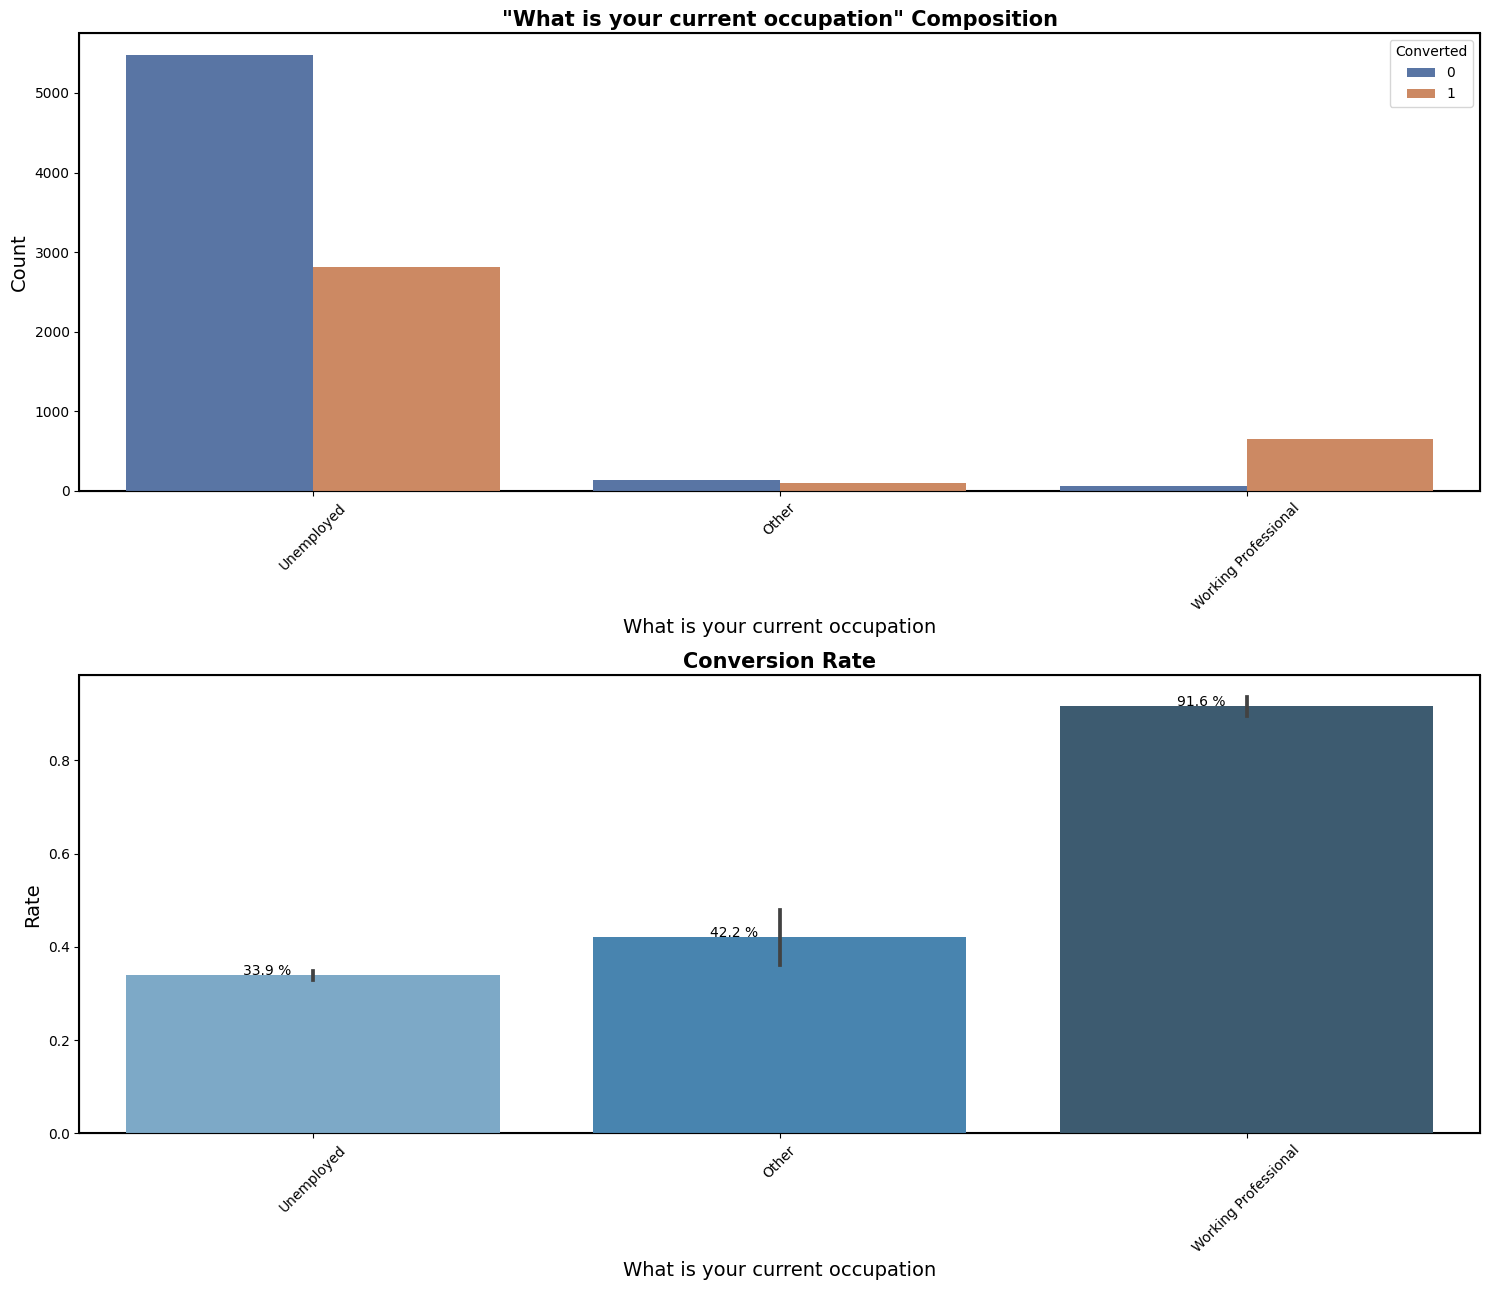

In [75]:
 plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('What is your current occupation', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('What is your current occupation', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()


*Analysis : 1.Working professionals occupation should be targeted since their  conversion rate is  92%

Country

In [76]:
print(100*df.Country.value_counts(normalize=True,dropna=False) )
print("-----------------------------------------")
print("Null values",df.Country.isnull().sum())


India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [77]:
# Imputting culumns
df.Country.fillna("Missing",inplace=True)
df['Country_new']=np.where(df['Country'].isin(['India']),df['Country'],'Others')


In [78]:
df['Country_new'].value_counts() /len(df.Country)

India     0.702597
Others    0.297403
Name: Country_new, dtype: float64

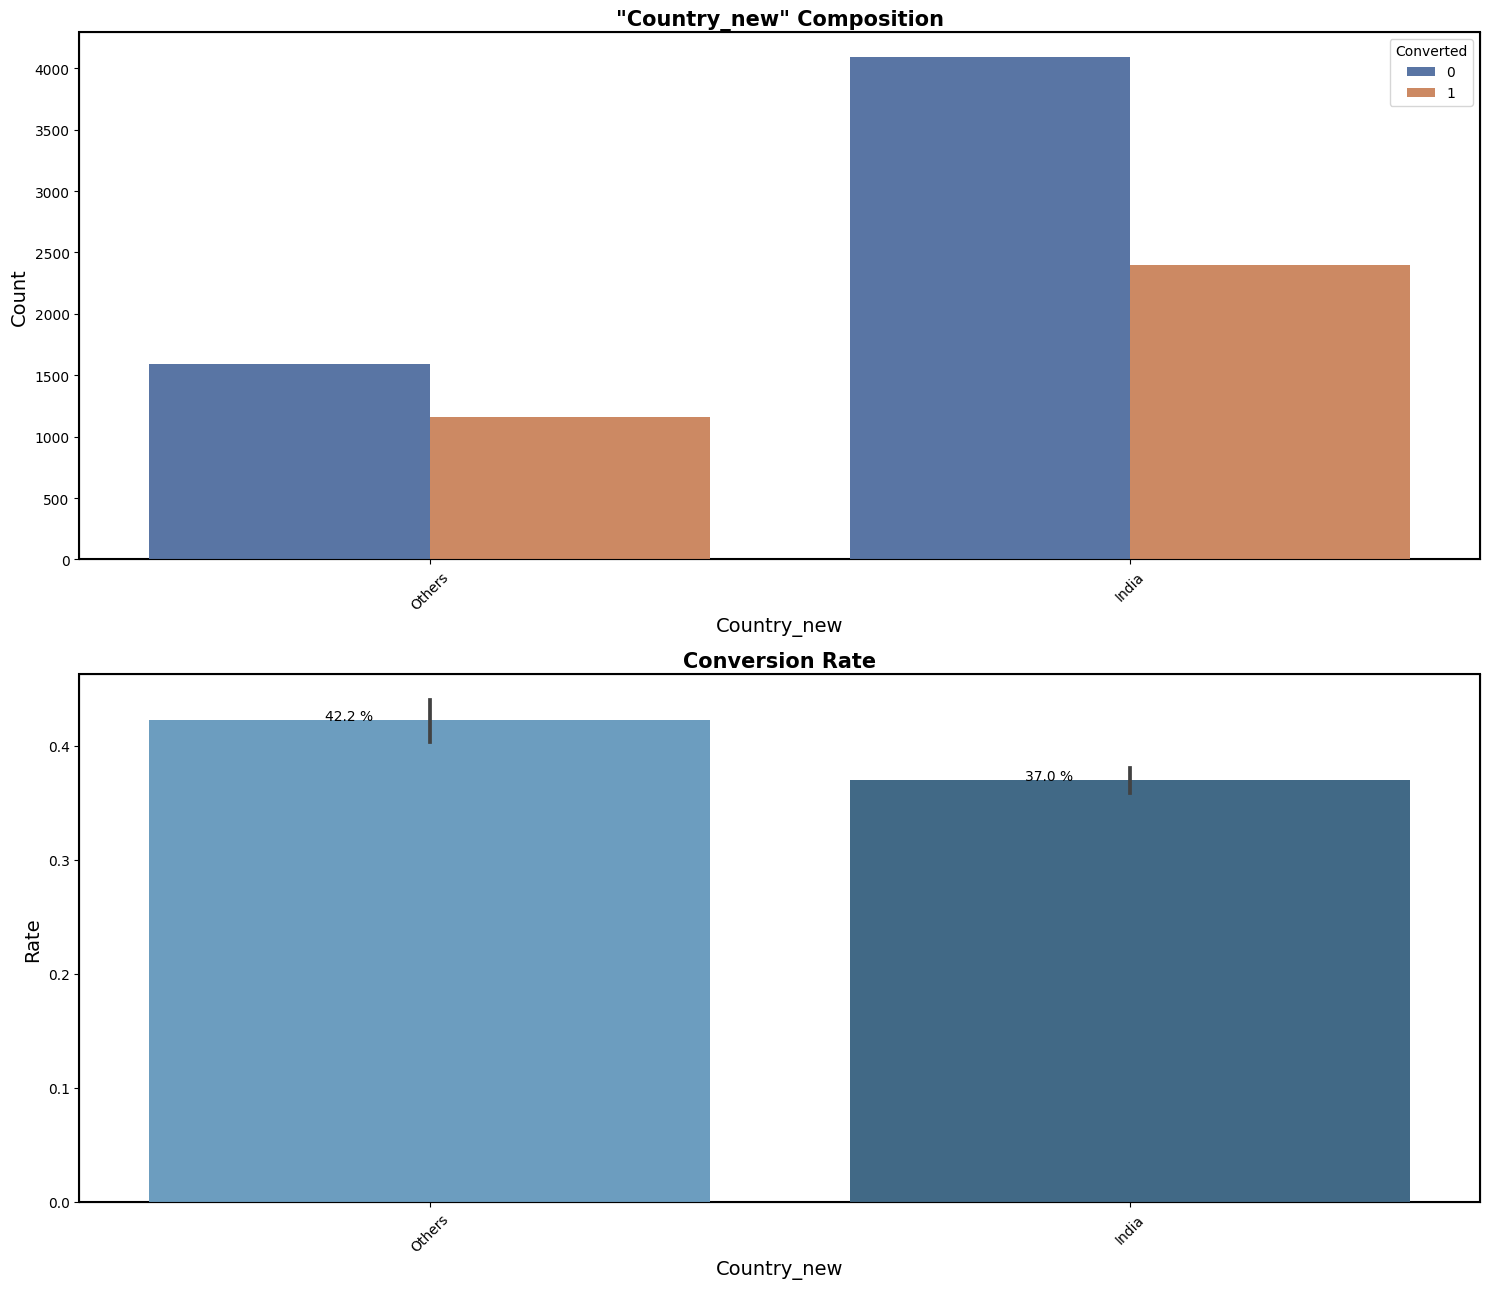

In [79]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Country_new', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Country_new', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)
plt.tight_layout()

In [80]:
df.drop(['Country'] , axis= 1,inplace=True)

Lead Source

In [81]:
# Imputting missing values and values with <55 to others and chang google to Google in Lead Source
print(100*df['Lead Source'].value_counts(normalize=True))
print("null values :",df['Lead Source'].isnull().sum())

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64
null values : 36


In [82]:
# Drop null values in the 'Lead Source' column
df = df.dropna(subset=['Lead Source'])
print("null values :",df['Lead Source'].isnull().sum())

null values : 0


In [83]:

df["Lead Source"].replace(to_replace="google", value=df['Lead Source'].mode()[0], inplace=True)
df["Lead Source"].replace(to_replace="Facebook", value='others', inplace=True)
df["Lead Source"].replace(to_replace="bing", value='others' , inplace=True)
df["Lead Source"].replace(to_replace="Click2call", value='others' , inplace=True)
df["Lead Source"].replace(to_replace="Press_Release", value='others' , inplace=True)
df["Lead Source"].replace(to_replace="Social Media", value='others' , inplace=True)
df["Lead Source"].replace(to_replace="Live Chat", value='others' , inplace=True)
df["Lead Source"].replace(to_replace="youtubechannel", value='others', inplace=True)
df["Lead Source"].replace(to_replace="testone", value='others', inplace=True)
df["Lead Source"].replace(to_replace="Pay per Click Ads", value='others', inplace=True)
df["Lead Source"].replace(to_replace="welearnblog_Home", value='others', inplace=True)
df["Lead Source"].replace(to_replace="WeLearn", value='others', inplace=True)
df["Lead Source"].replace(to_replace="blog", value='others', inplace=True)
df["Lead Source"].replace(to_replace="Referral Sites", value='others', inplace=True)
df["Lead Source"].replace(to_replace="NC_EDM", value='others', inplace=True)

# df["Lead Source"].replace(to_replace="Reference", value='others', inplace=True)
# df["Lead Source"].replace(to_replace="Welingak Website", value='others', inplace=True)

In [84]:
print(df['Lead Source'].value_counts(normalize=True))
# print("null values :",df['Lead Source'].isnull().sum())

Google              0.312147
Direct Traffic      0.276293
Olark Chat          0.190678
Organic Search      0.125380
Reference           0.058018
others              0.022056
Welingak Website    0.015428
Name: Lead Source, dtype: float64


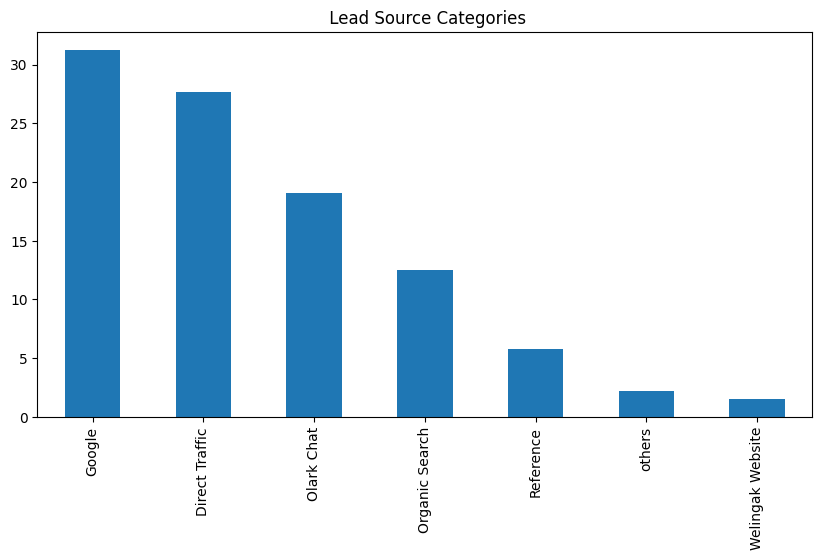

In [88]:
df['Lead Source'].value_counts(normalize=True).mul(100).plot(kind = 'bar', figsize = [10,5])
plt.title(" Lead Source Categories");

 *Analysis:
 1.Google is a major source of leads when bringing the clients but they are less likely to be converted compared to customers through "Welingak Website" and "Reference " .
 2."Welingak Website should be our top priority since they are more likely to be converted.

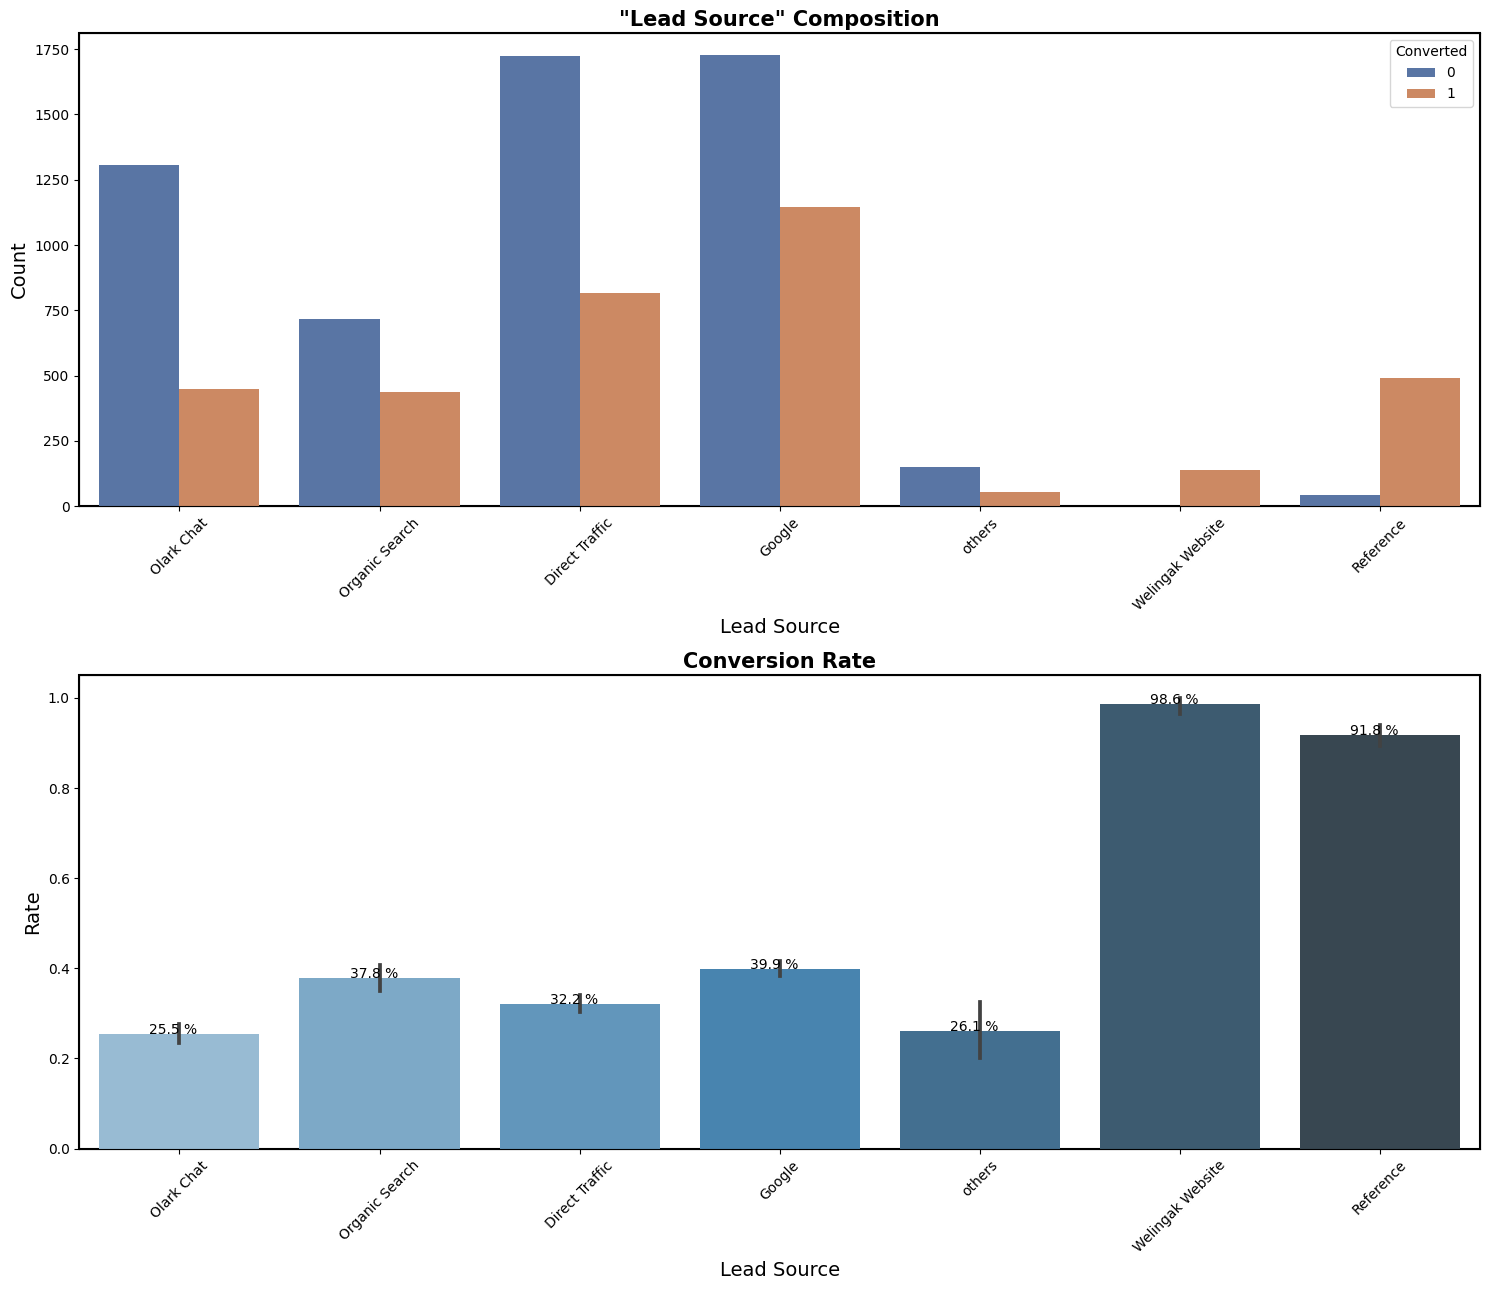

In [89]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Lead Source', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Lead Source', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

B.Inspect Numeric data 1:

TotalVisits

In [90]:
print("NullValues:",df['TotalVisits'].isnull().sum()/len(df['TotalVisits']))
print(df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace = True))

NullValues: 0.014124293785310734
None


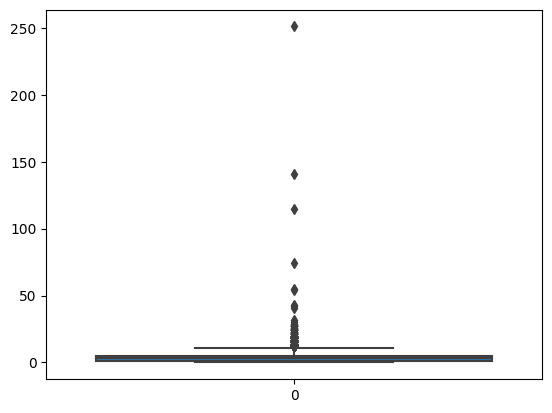

In [91]:
sns.boxplot(df.TotalVisits)
plt.show()

In [92]:
df.TotalVisits.quantile([0.6,0.75,0.95,0.99,1])

0.60      3.0
0.75      5.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [93]:
Q11 = df['TotalVisits'].quantile(0.00)
Q14 = df['TotalVisits'].quantile(0.99)
df['TotalVisits'][df['TotalVisits'] <= Q11]=Q11
df['TotalVisits'][df['TotalVisits'] >= Q14]=Q14

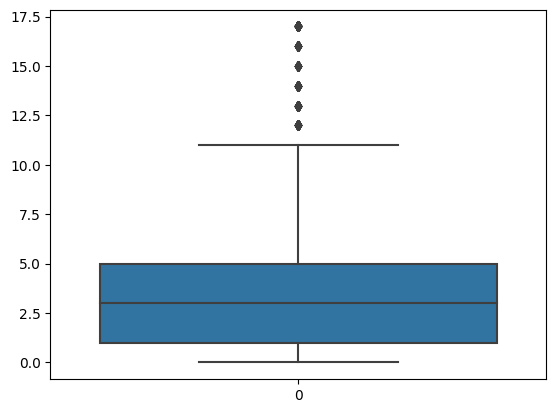

In [94]:
sns.boxplot(df.TotalVisits)
plt.show()

In [95]:
 df['TotalVisits'].value_counts(normalize=True)

0.0     0.234789
2.0     0.182421
3.0     0.156019
4.0     0.121686
5.0     0.085072
6.0     0.050630
1.0     0.042916
7.0     0.033572
8.0     0.024337
9.0     0.017818
10.0    0.012386
17.0    0.010756
11.0    0.009344
13.0    0.005215
12.0    0.004889
14.0    0.003911
16.0    0.002282
15.0    0.001956
Name: TotalVisits, dtype: float64

In [96]:

# Create a Pandas Series with the total pages visit count.
series = df['TotalVisits']

# Create a list of bin boundaries.
bins = [0, 3, 6, 9, 12]

# Bin the data into the list of bins.
series["bin"] = pd.cut(series, bins)

# Count the number of values in each bin.
counts = series["bin"].value_counts()

# Print the counts.
print(counts)

(0, 3]     3510
(3, 6]     2369
(6, 9]      697
(9, 12]     245
Name: TotalVisits, dtype: int64


Text(0.5, 1.0, ' TotalVisits ')

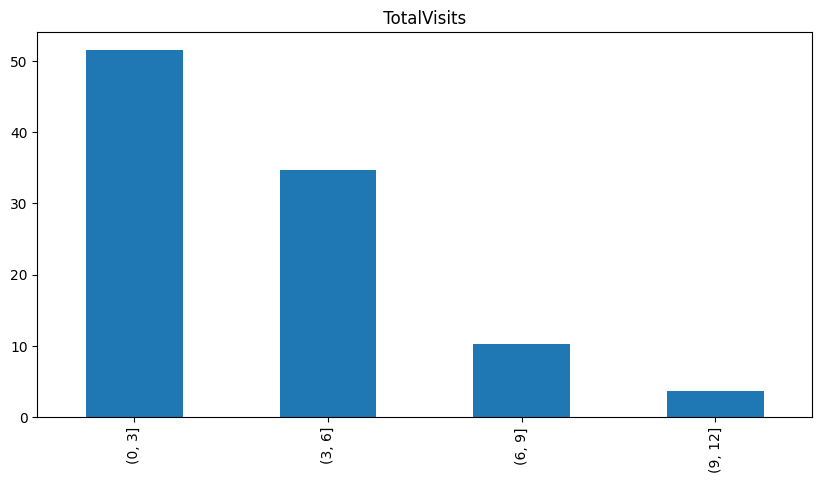

In [98]:
series["bin"].value_counts(normalize=True).mul(100).plot(kind = 'bar', figsize = [10,5])
plt.title(" TotalVisits ")

*The 0 to 3 bin had a higher number of total visits than the other bins

Page Views Per Visit

In [99]:
print("NullValues:",df['Page Views Per Visit'].isnull().sum())

NullValues: 130


In [100]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace = True)

In [101]:
print(df['Page Views Per Visit'].value_counts(normalize=True))

0.00    0.234789
2.00    0.209040
3.00    0.129944
4.00    0.097349
1.00    0.070730
          ...   
3.43    0.000109
2.56    0.000109
6.33    0.000109
1.64    0.000109
2.08    0.000109
Name: Page Views Per Visit, Length: 114, dtype: float64


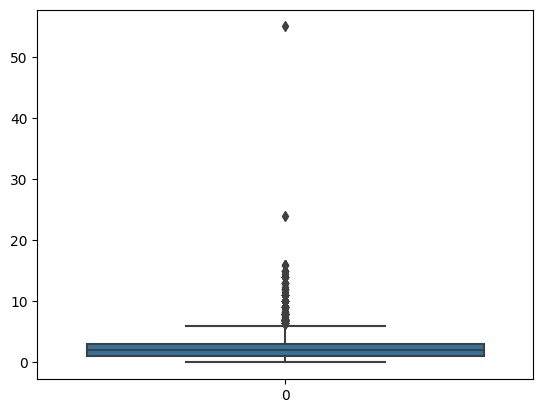

In [102]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [103]:
df['Page Views Per Visit'].quantile([0.6,0.75,0.95,0.99,1])

0.60     2.5
0.75     3.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [104]:
Q11 = df['Page Views Per Visit'].quantile(0.00)
Q14 = df['Page Views Per Visit'].quantile(0.99)
df['Page Views Per Visit'][df['Page Views Per Visit']<= Q11]=Q11
df['Page Views Per Visit'][df['Page Views Per Visit'] >= Q14]=Q14

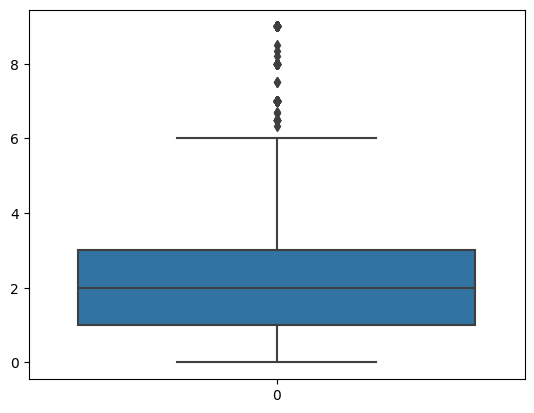

In [105]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

Inspect Categorical Variable:Last Activity

In [106]:
100*df['Last Activity'].value_counts(normalize=True,dropna=True)

Email Opened                    37.701857
SMS Sent                        29.913215
Olark Chat Conversation         10.688784
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.526310
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      1.021641
Unsubscribed                     0.648138
Had a Phone Conversation         0.329562
Approached upfront               0.098869
View in browser link Clicked     0.065912
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64

In [107]:

print("null values",df['Last Activity'].isnull().sum()/len(df['Last Activity']))

null values 0.01097348978704911


In [108]:
df.dropna(subset=['Last Activity'],inplace=True)

In [109]:

print("null values",df['Last Activity'].isnull().sum())
x=df['Last Activity'].value_counts(normalize = True).mul(100)
print(x)

null values 0
Email Opened                    37.701857
SMS Sent                        29.913215
Olark Chat Conversation         10.688784
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.526310
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      1.021641
Unsubscribed                     0.648138
Had a Phone Conversation         0.329562
Approached upfront               0.098869
View in browser link Clicked     0.065912
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64


In [110]:
df['Last Activity'] = df['Last Activity'].replace(list(x[x < 5].index), 'Others')


Text(0, 0.5, 'count of lead')

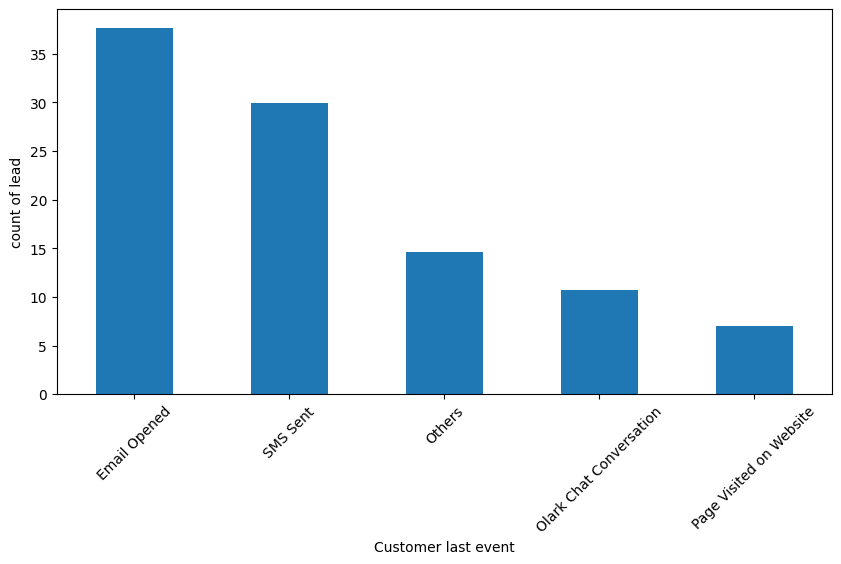

In [111]:
df['Last Activity'].value_counts(normalize = True).mul(100) .round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)
plt.xlabel('Customer last event')
plt.ylabel('count of lead')

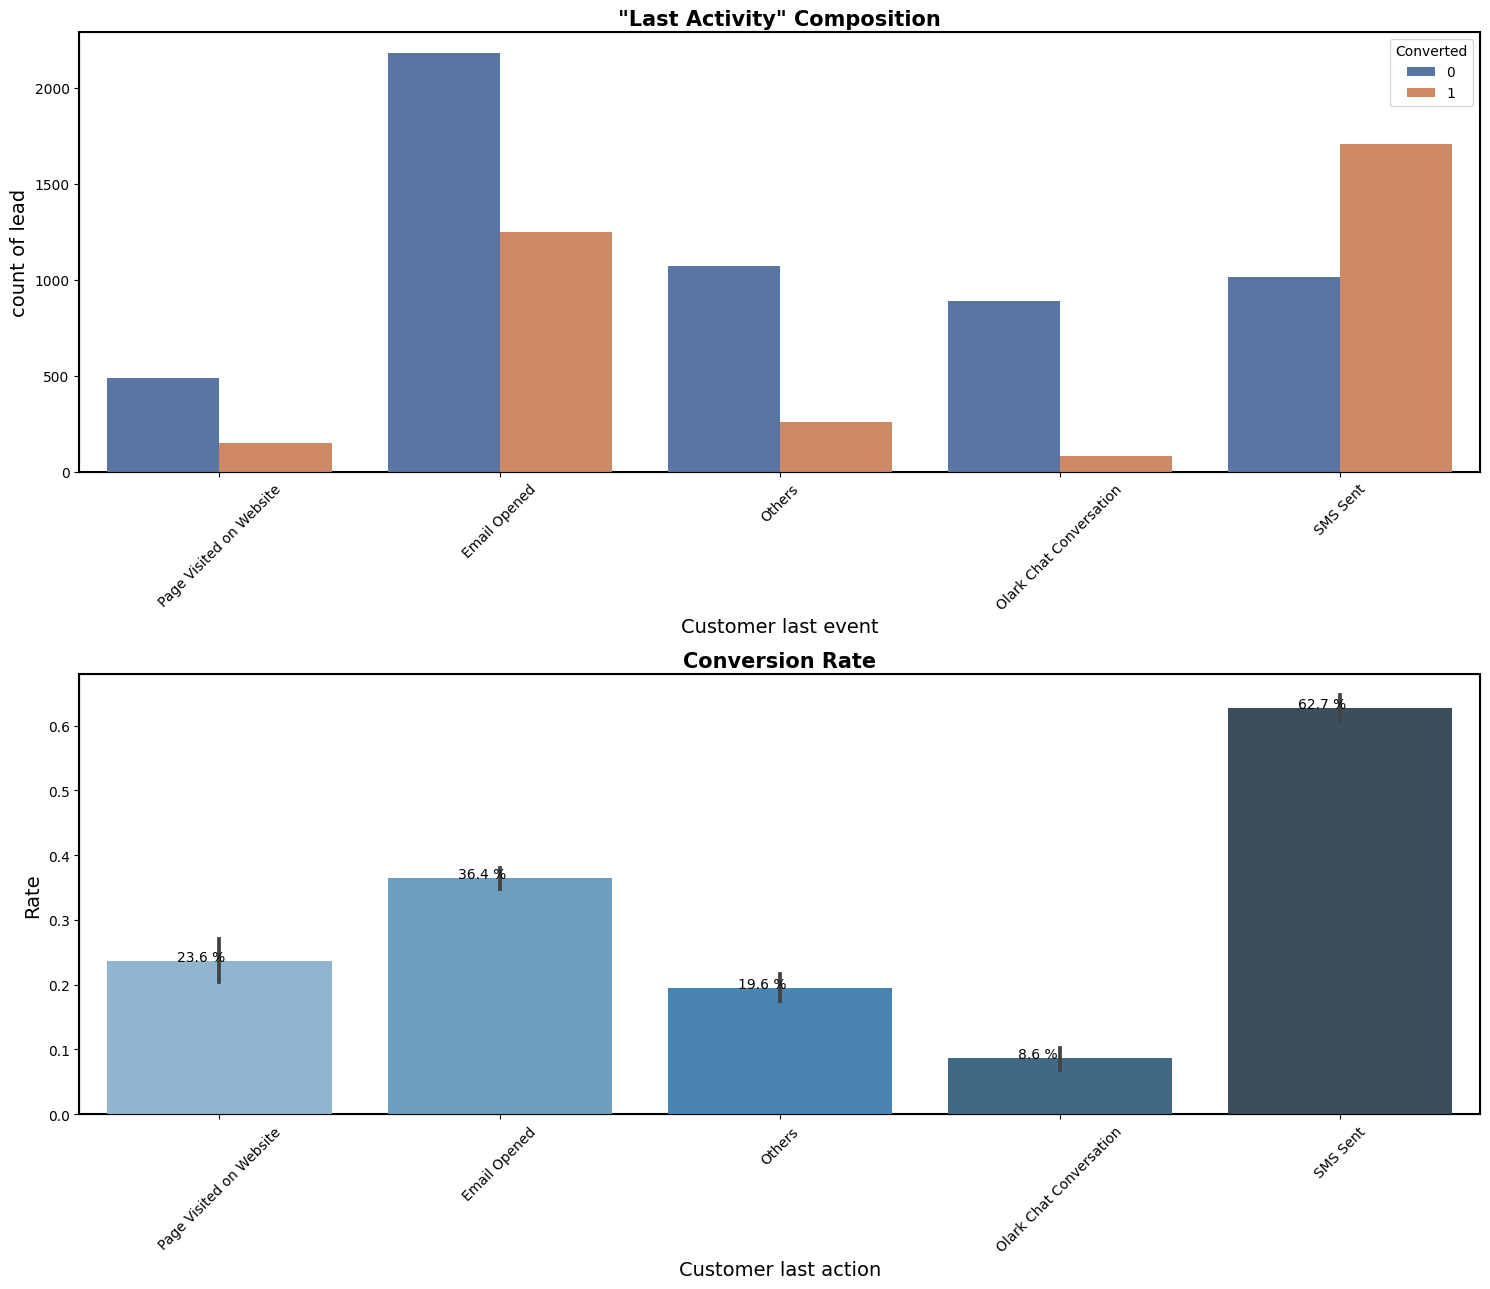

In [112]:


plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Last Activity', 'Converted')
plt.xlabel('Customer last event')
plt.ylabel('count of lead')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)
plt.xlabel('Customer last action')
plt.tight_layout()



Analysis:8.	Customer with last activity as SMS Sent should be targeted more  since their  conversion rate is 61% and count of those customers are also more.

Scrutinize each column

In [113]:
# Inspect: Lead Origin

In [114]:
print(df['Lead Origin'].value_counts())
print("null values :",df['Lead Origin'].isna().sum())

Landing Page Submission    4885
API                        3580
Lead Add Form               600
Lead Import                  38
Name: Lead Origin, dtype: int64
null values : 0


In [115]:
df["Lead Origin"]=np.where(df["Lead Origin"].isin(['Landing Page Submission','API']),df["Lead Origin"],"Other Add Form")

In [116]:
print(100*df['Lead Origin'].value_counts(normalize=True))


Landing Page Submission    53.663627
API                        39.327694
Other Add Form              7.008678
Name: Lead Origin, dtype: float64


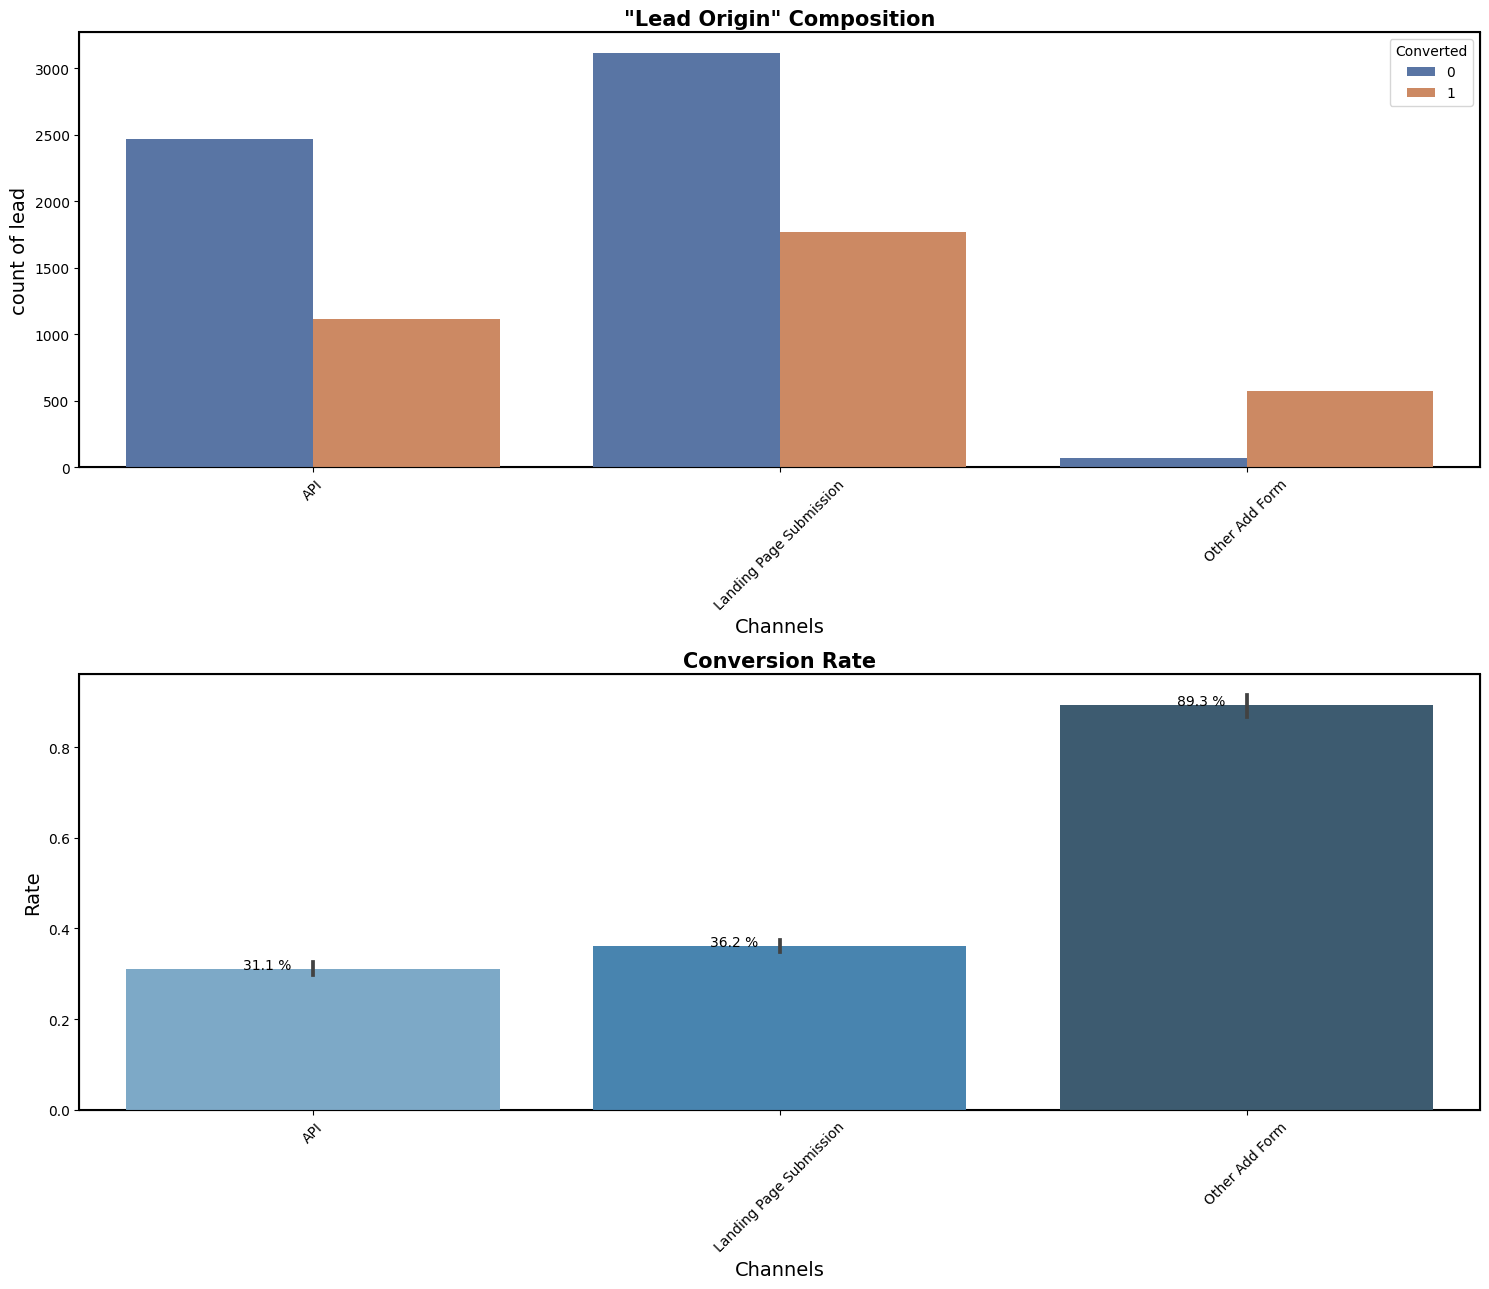

In [117]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Lead Origin', 'Converted')
plt.xticks(rotation = 45)
plt.xlabel('Channels')
plt.ylabel('count of lead')
# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Lead Origin', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)
plt.xlabel('Channels')

plt.tight_layout()

Analysis : Most Landing Page Submission customer have high numbers are assumed to be potential lead but their conversion rate is 36% .'other Add form' customers have more conversion rate even thoug their count is less and this group should be targetted more

Inspect : Do Not Email

In [ ]:
print(df['Do Not Email'].value_counts())
print("Null Values",df['Do Not Email'].isnull().sum())

No     8382
Yes     721
Name: Do Not Email, dtype: int64
Null Values 0


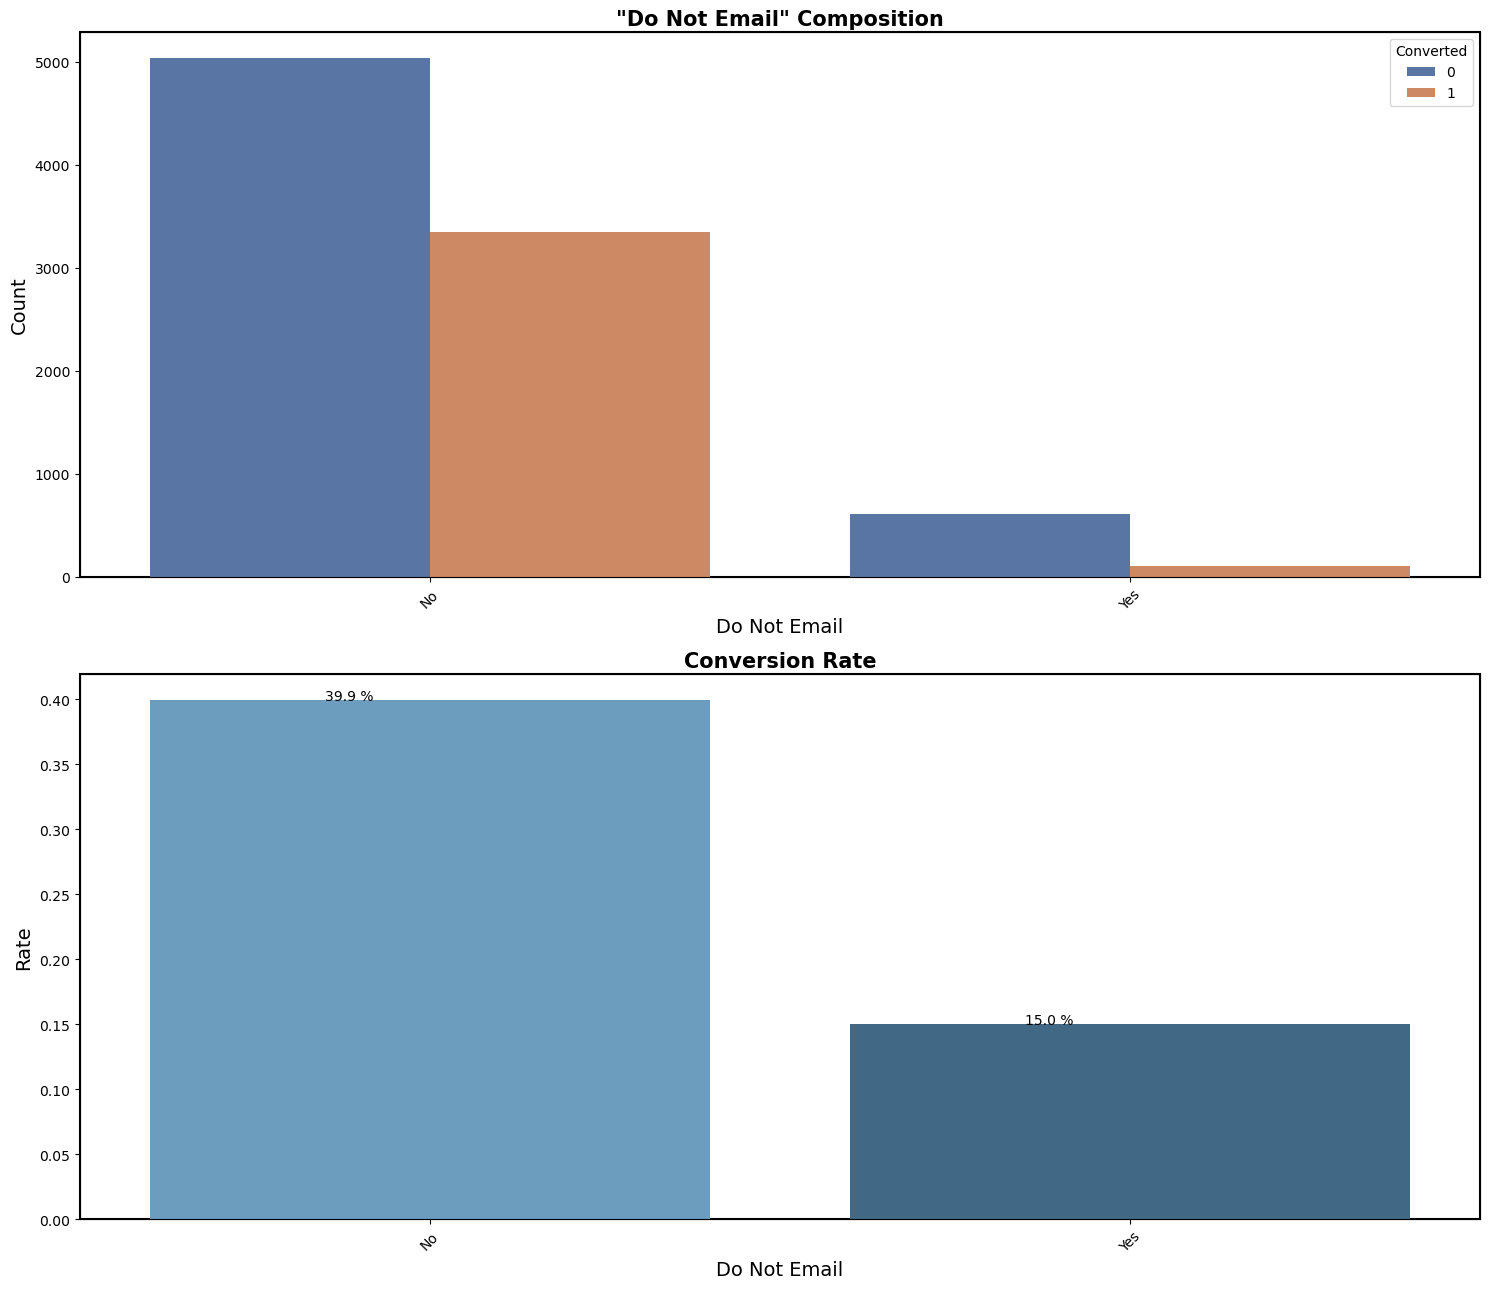

In [ ]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Do Not Email', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Do Not Email', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

*.Analysis:Customers who have selected "Do Not Email" as Yes are less likely to be converted

Inspect : Do Not Call

In [118]:
print(df['Do Not Call'].value_counts())
print("Null Values",df['Do Not Call'].isnull().sum())
# Dropping this column since the value of yes is too low (i.e., data is skewed)


No     9101
Yes       2
Name: Do Not Call, dtype: int64
Null Values 0


In [119]:
df.drop('Do Not Call',axis=1,inplace=True)


Inspect Target Variable: Converted

In [120]:
print(df['Converted'].value_counts() )
print("Null Values",df['Converted'].isnull().sum())

0    5651
1    3452
Name: Converted, dtype: int64
Null Values 0


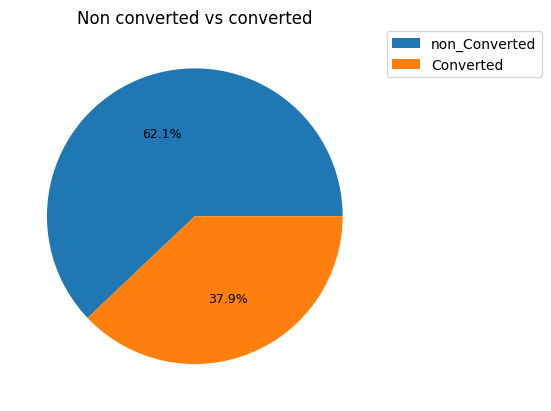

In [121]:
labels=['non_Converted','Converted']
ax=df.Converted.value_counts(normalize=True).plot(kind="pie",ylabel='',labels=labels,legend=True,labeldistance=None,title='Non converted vs converted',autopct='%1.1f%%', radius=1, shadow=False,fontsize=9)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [122]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'City_new', 'Country_new'],
      dtype='object')

14.inspect :I agree to pay the amount through cheque','Magazine','Newspaper Article','X Education Forums','Search','Newspaper','Through Recommendations','Update me on Supply Chain Content', 'Get updates on DM Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement'

In [123]:
# Since these columns contains only one value ,data is skewed so dropping from further analysis 'Do Not Call','Magazine','Newspaper Article','X Education Forums','Search','Newspaper','Through Recommendations','Update me on Supply Chain Content', 'Get updates on DM Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement'
unwanted_col=['Do Not Email','I agree to pay the amount through cheque','Magazine','Newspaper Article','X Education Forums','Search','Newspaper','Through Recommendations','Update me on Supply Chain Content', 'Get updates on DM Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Country_new','City_new']
df.drop(unwanted_col, axis = 1, inplace = True)

In [124]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

15:Inspect :Lead Profile

In [125]:
# df['Lead Profile'].isnull().sum()
# df['Lead Profile'].fillna('Potential Lead',inplace=True)

In [126]:
# #replacing 'Select' with NaN
# df['Lead Profile'].replace({'Select': 'Potential Lead'} ,inplace=True)
# df['Lead Profile'].value_counts()
# # Considering all Leads as Potential Leads

In [127]:
# plt.figure(figsize = [15,13])
# plt.subplot(211)
# hue_count('Lead Profile', 'Converted')
# plt.xticks(rotation = 45)

# # Rate of conversion
# plt.subplot(212)
# conversion_rate_plot('Lead Profile', 'Converted', p = 'Blues_d')
# plt.xticks(rotation = 45)

# plt.tight_layout()

*.Analysis:Only 39.3% customers are onverted who are assumed to be potential Lead customers.Dual Specialization Student and Lateral Student will be our next targets after potential Lead customers

In [128]:
# Checking other columns

Inspect Numeric :Total Time Spent on Website

In [129]:
print(df['Total Time Spent on Website'].value_counts())
print("NullValues:",df['Total Time Spent on Website'].isnull().sum())
# No null values found

0       2165
60        19
127       18
75        18
62        17
        ... 
1407       1
1673       1
757        1
696        1
927        1
Name: Total Time Spent on Website, Length: 1721, dtype: int64
NullValues: 0


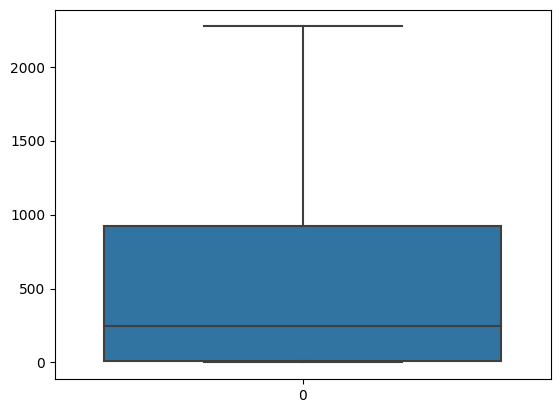

In [130]:
# Checking Outliers
sns.boxplot(df['Total Time Spent on Website'])
plt.show()
# No outliers found

In [131]:
df['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

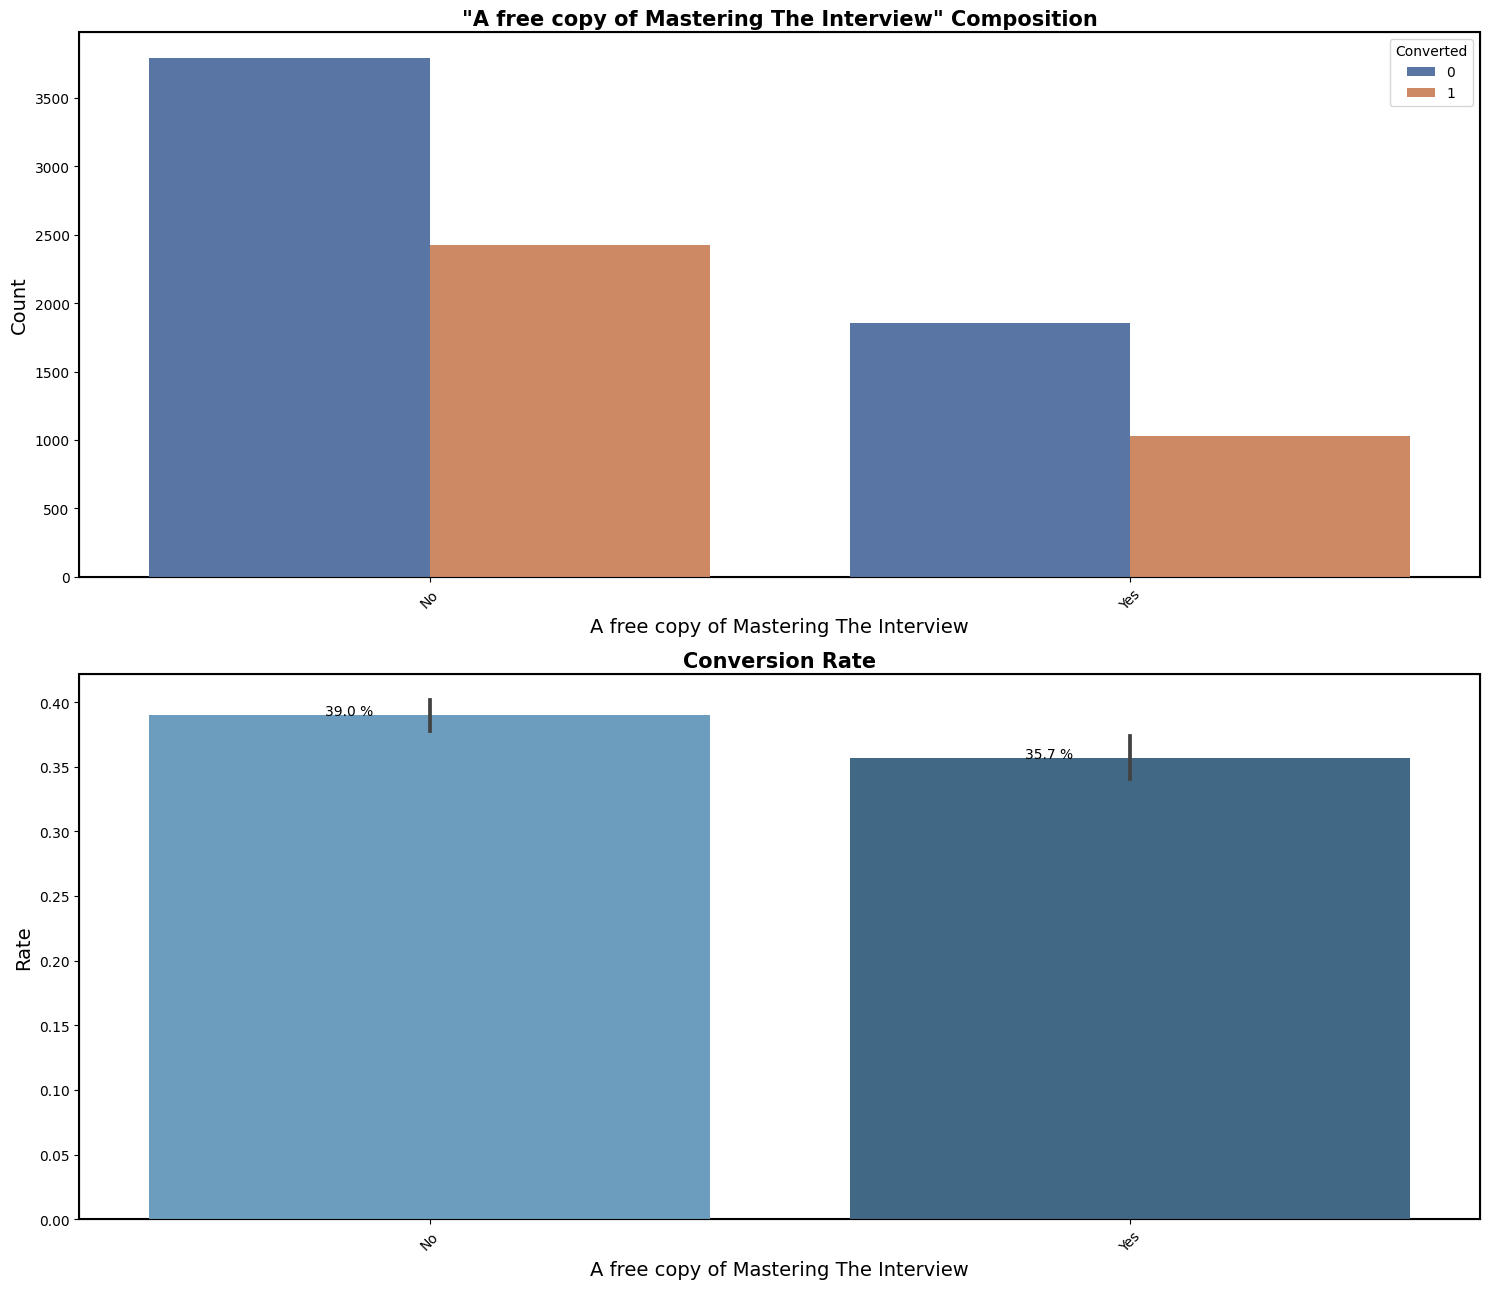

In [132]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('A free copy of Mastering The Interview', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('A free copy of Mastering The Interview', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

Last Notable Activity

In [133]:
100*df['Last Notable Activity'].value_counts(normalize=True)

Modified                        36.207844
Email Opened                    31.011754
SMS Sent                        23.640558
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.494343
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Approached upfront               0.010985
Resubscribed to emails           0.010985
View in browser link Clicked     0.010985
Form Submitted on Website        0.010985
Email Received                   0.010985
Name: Last Notable Activity, dtype: float64

In [134]:
x=100*df['Last Notable Activity'].value_counts(normalize=True)
df['Last Notable Activity']=df['Last Notable Activity'].replace(list(x[x<4].index),"Others")

In [135]:
df['Last Notable Activity'].value_counts()

Modified        3296
Email Opened    2823
SMS Sent        2152
Others           832
Name: Last Notable Activity, dtype: int64

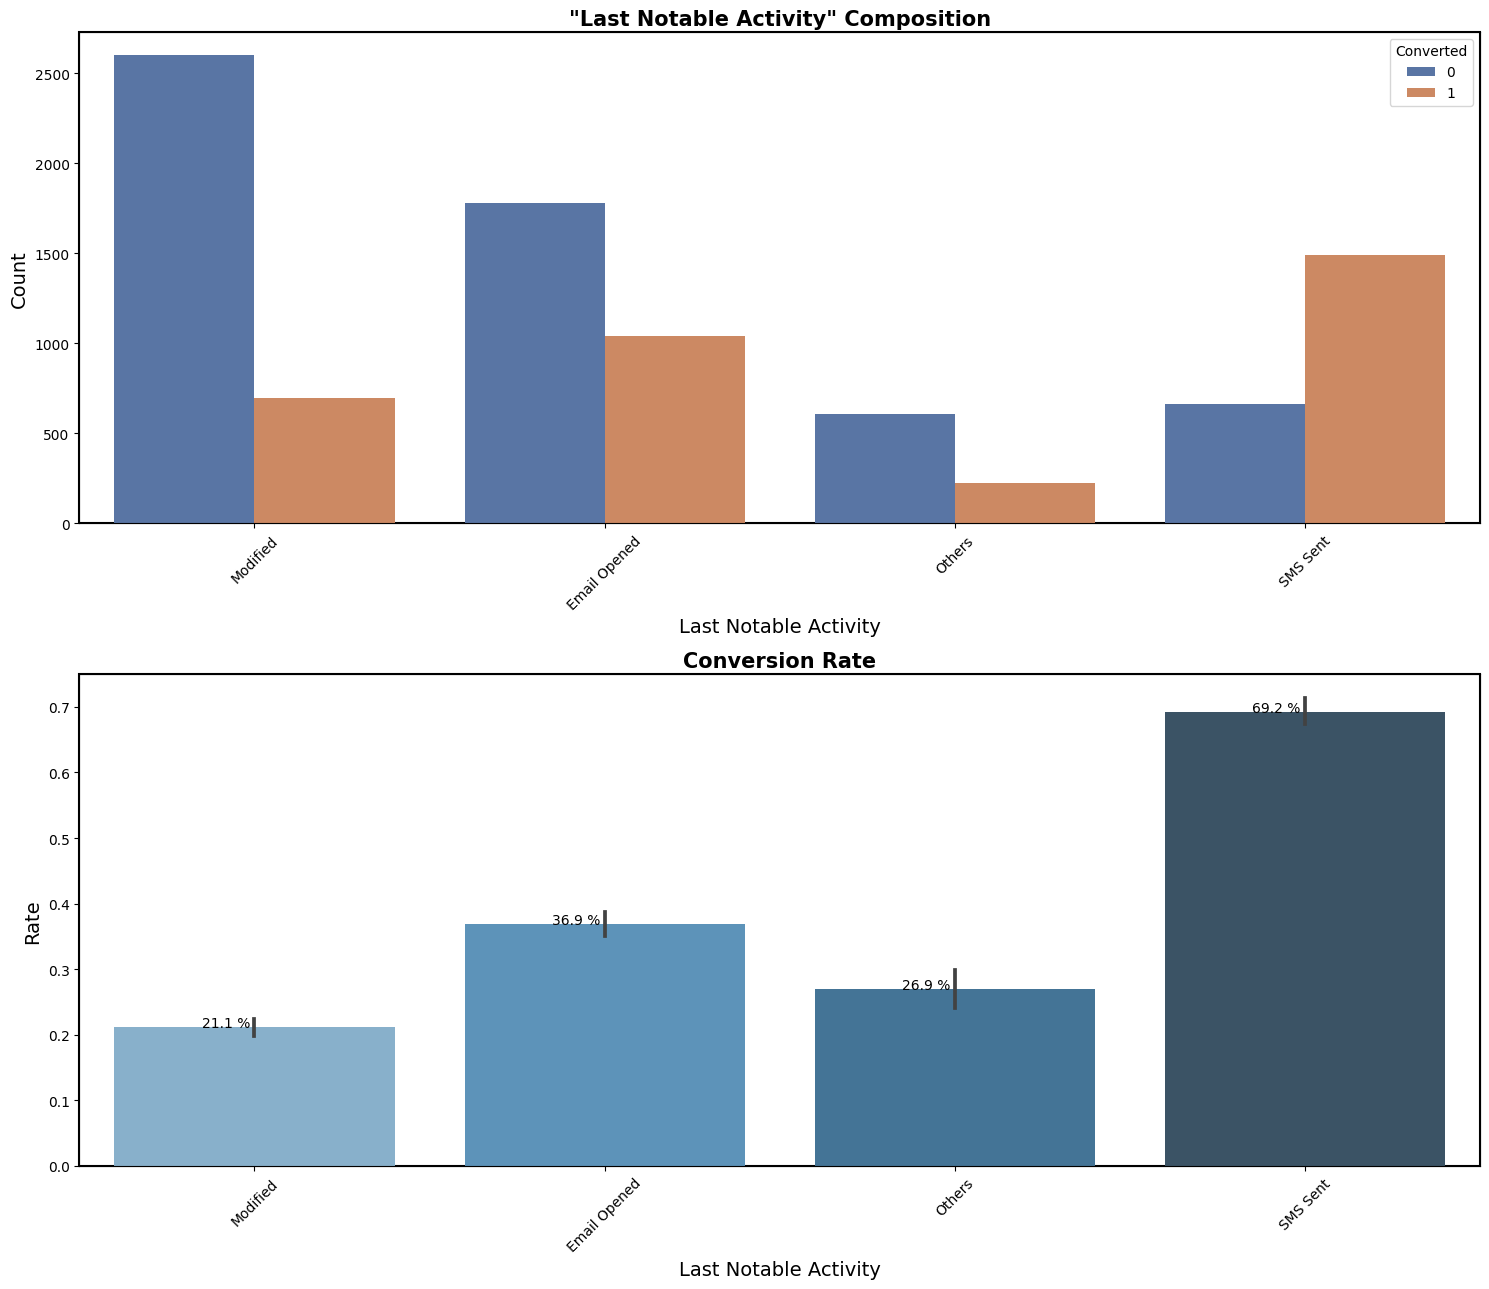

In [136]:
plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Last Notable Activity', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Notable Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()

Analysis:Last Notable Activity with SMS_SENT are likely to be targetted

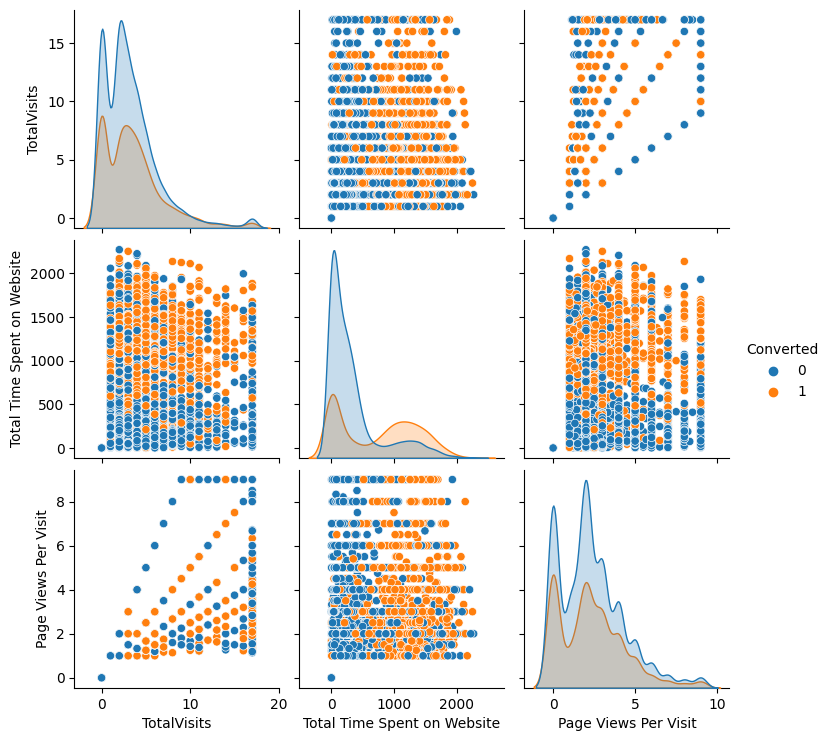

In [137]:

sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

Data Imbalance:

In [138]:
df_nonhotleads=df.loc[df["Converted"]==0]
df_hotleads=df.loc[df["Converted"]==1]

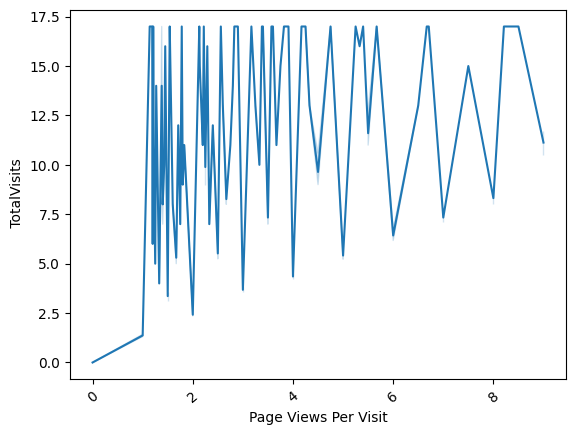

In [139]:
sns.lineplot(data=df_nonhotleads, x='Page Views Per Visit', y='TotalVisits')
plt.ylabel(" TotalVisits")
plt.xlabel("Page Views Per Visit")

plt.xticks(rotation=40)
plt.show()

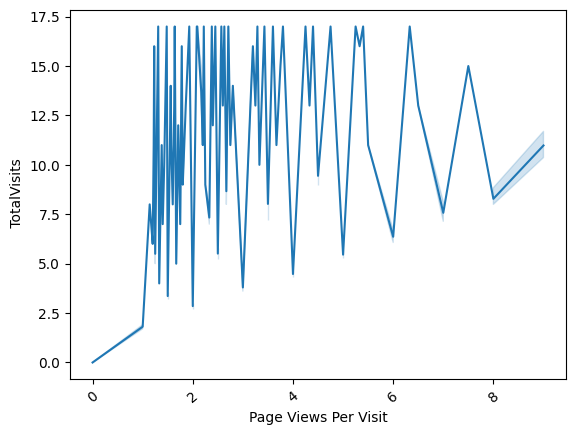

In [140]:
sns.lineplot(data=df_hotleads, x='Page Views Per Visit', y='TotalVisits')
plt.ylabel(" TotalVisits")
plt.xlabel("Page Views Per Visit")

plt.xticks(rotation=40)
plt.show()

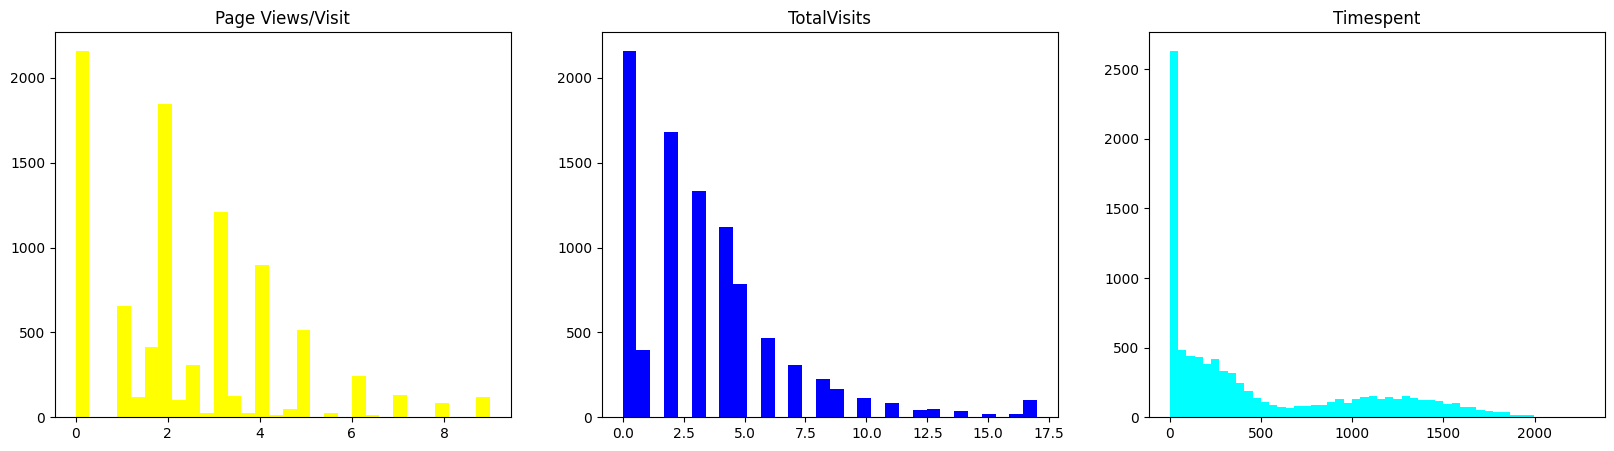

In [146]:
import seaborn as sns
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=[20,5])
# Plot the histograms
axes[0].hist(df['Page Views Per Visit'], bins=30, label='Page Views/Visit',color='#FFFF00')
axes[1].hist(df['TotalVisits'], bins=30, label='TotalVisits',color='#0000FF')
axes[2].hist(df['Total Time Spent on Website'], bins=50, label='Timespent',color='#00FFFF')

# Set the titles of the subplots
axes[0].set_title('Page Views/Visit')
axes[1].set_title('TotalVisits')
axes[2].set_title('Timespent')

# Show the figure
plt.show()

<!-- Step 2: Visualising/ Data understanding  -->

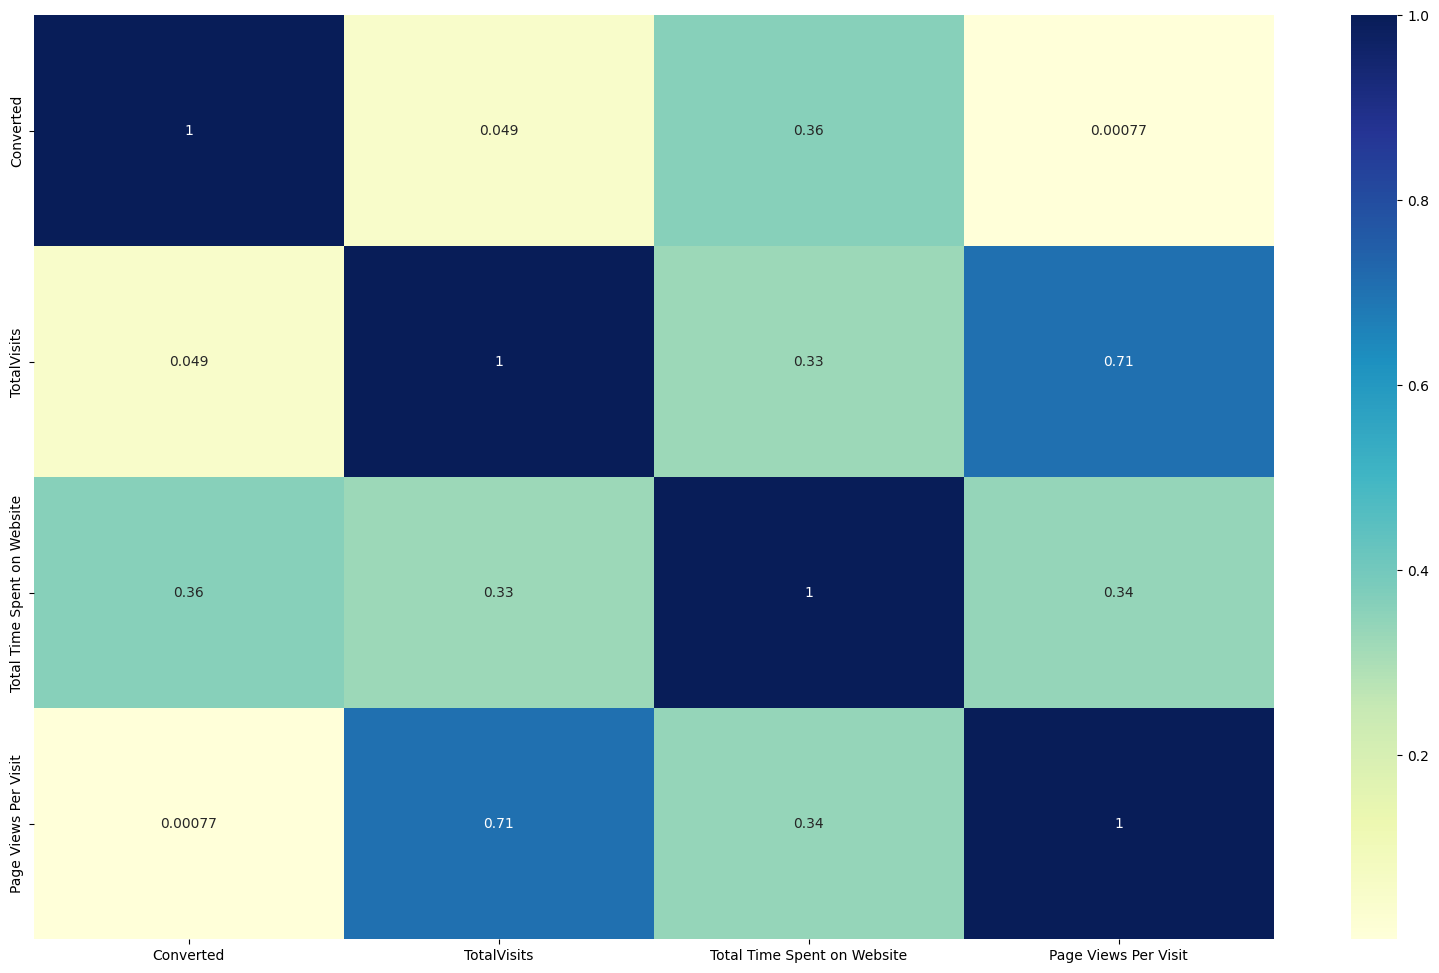

In [149]:
#checking corelation
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations based on above Heatmap

1. Positive corelation exist between Page views per visit and target variable "Total Visits".

2.No corelation between "Page views per visit" and Target variable "converted" since value is almost almost equalto zero.




# Data Preparation-
1.Create dummy variable for all categorical variable.
2.Perform Train test Split (used 70:30)
3.Perform Scaling (Used MinMax scaler)

# Dummy Variable

In [150]:
# Get the value counts of all the columns

categorical_var = df.loc[:, df.dtypes == 'object']
categorical_var.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [151]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [153]:
df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1,inplace=True)

In [154]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9103.000000  9103.000000                  9103.000000   
mean      0.379216     3.342085                   483.773921   
std       0.485219     3.247174                   545.519186   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   247.000000   
75%       1.000000     5.000000                   924.000000   
max       1.000000    17.000000                  2272.000000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           9103.000000                          9103.000000   
mean               2.340154                             0.536636   
std                1.981564                             0.498683   
min                0.000000                             0.000000   
25%                1.000000                             0.000000   
50%                2.000000                             1.000000   
75%                3.000000                             1.000000   
max                9.000000                             1.000000   

       Lead Origin_Other Add Form  Lead Source_Google  Lead Source_Olark Chat  \
count                 9103.000000         9103.000000             9103.000000   
mean                     0.070087            0.315610                0.192794   
std                      0.255307            0.464784                0.394514   
min                      0.000000            0.000000                0.000000   
25%                      0.000000            0.000000                0.000000   
50%                      0.000000            0.000000                0.000000   
75%                      0.000000            1.000000                0.000000   
max                      1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Reference  ...  \
count                 9103.000000            9103.000000  ...   
mean                     0.126771               0.050752  ...   
std                      0.332735               0.219504  ...   
min                      0.000000               0.000000  ...   
25%                      0.000000               0.000000  ...   
50%                      0.000000               0.000000  ...   
75%                      0.000000               0.000000  ...   
max                      1.000000               1.000000  ...   

       Specialization_Travel and Tourism  \
count                        9103.000000   
mean                            0.022190   
std                             0.147311   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       What is your current occupation_Unemployed  \
count                                 9103.000000   
mean                                     0.898825   
std                                      0.301577   
min                                      0.000000   
25%                                      1.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       What is your current occupation_Working Professional  \
count                                        9103.000000      
mean                                            0.075030      
std                                             0.263455      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       What matters most to you in choosing a course_Other  

In [155]:

# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())

    print('***********************************************************')

0    5651
1    3452
Name: Converted, dtype: int64
***********************************************************
0.0     2161
2.0     1679
3.0     1335
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64
***********************************************************
0       2165
60        19
127       18
75        18
157       17
        ... 
513        1
514        1
1473       1
1472       1
2272       1
Name: Total Time Spent on Website, Length: 1721, dtype: int64
***********************************************************
0.0     2161
2.0     1823
3.0     1196
4.0      896
1.0      651
        ... 
3.29       1
3.38       1
3.43       1
3.57       1
2.63       1
Name: Page Views Per Visit, Length: 102, dtype: int64
***********************************************************
1    4885
0    4218
Name: Lead Origin_Land

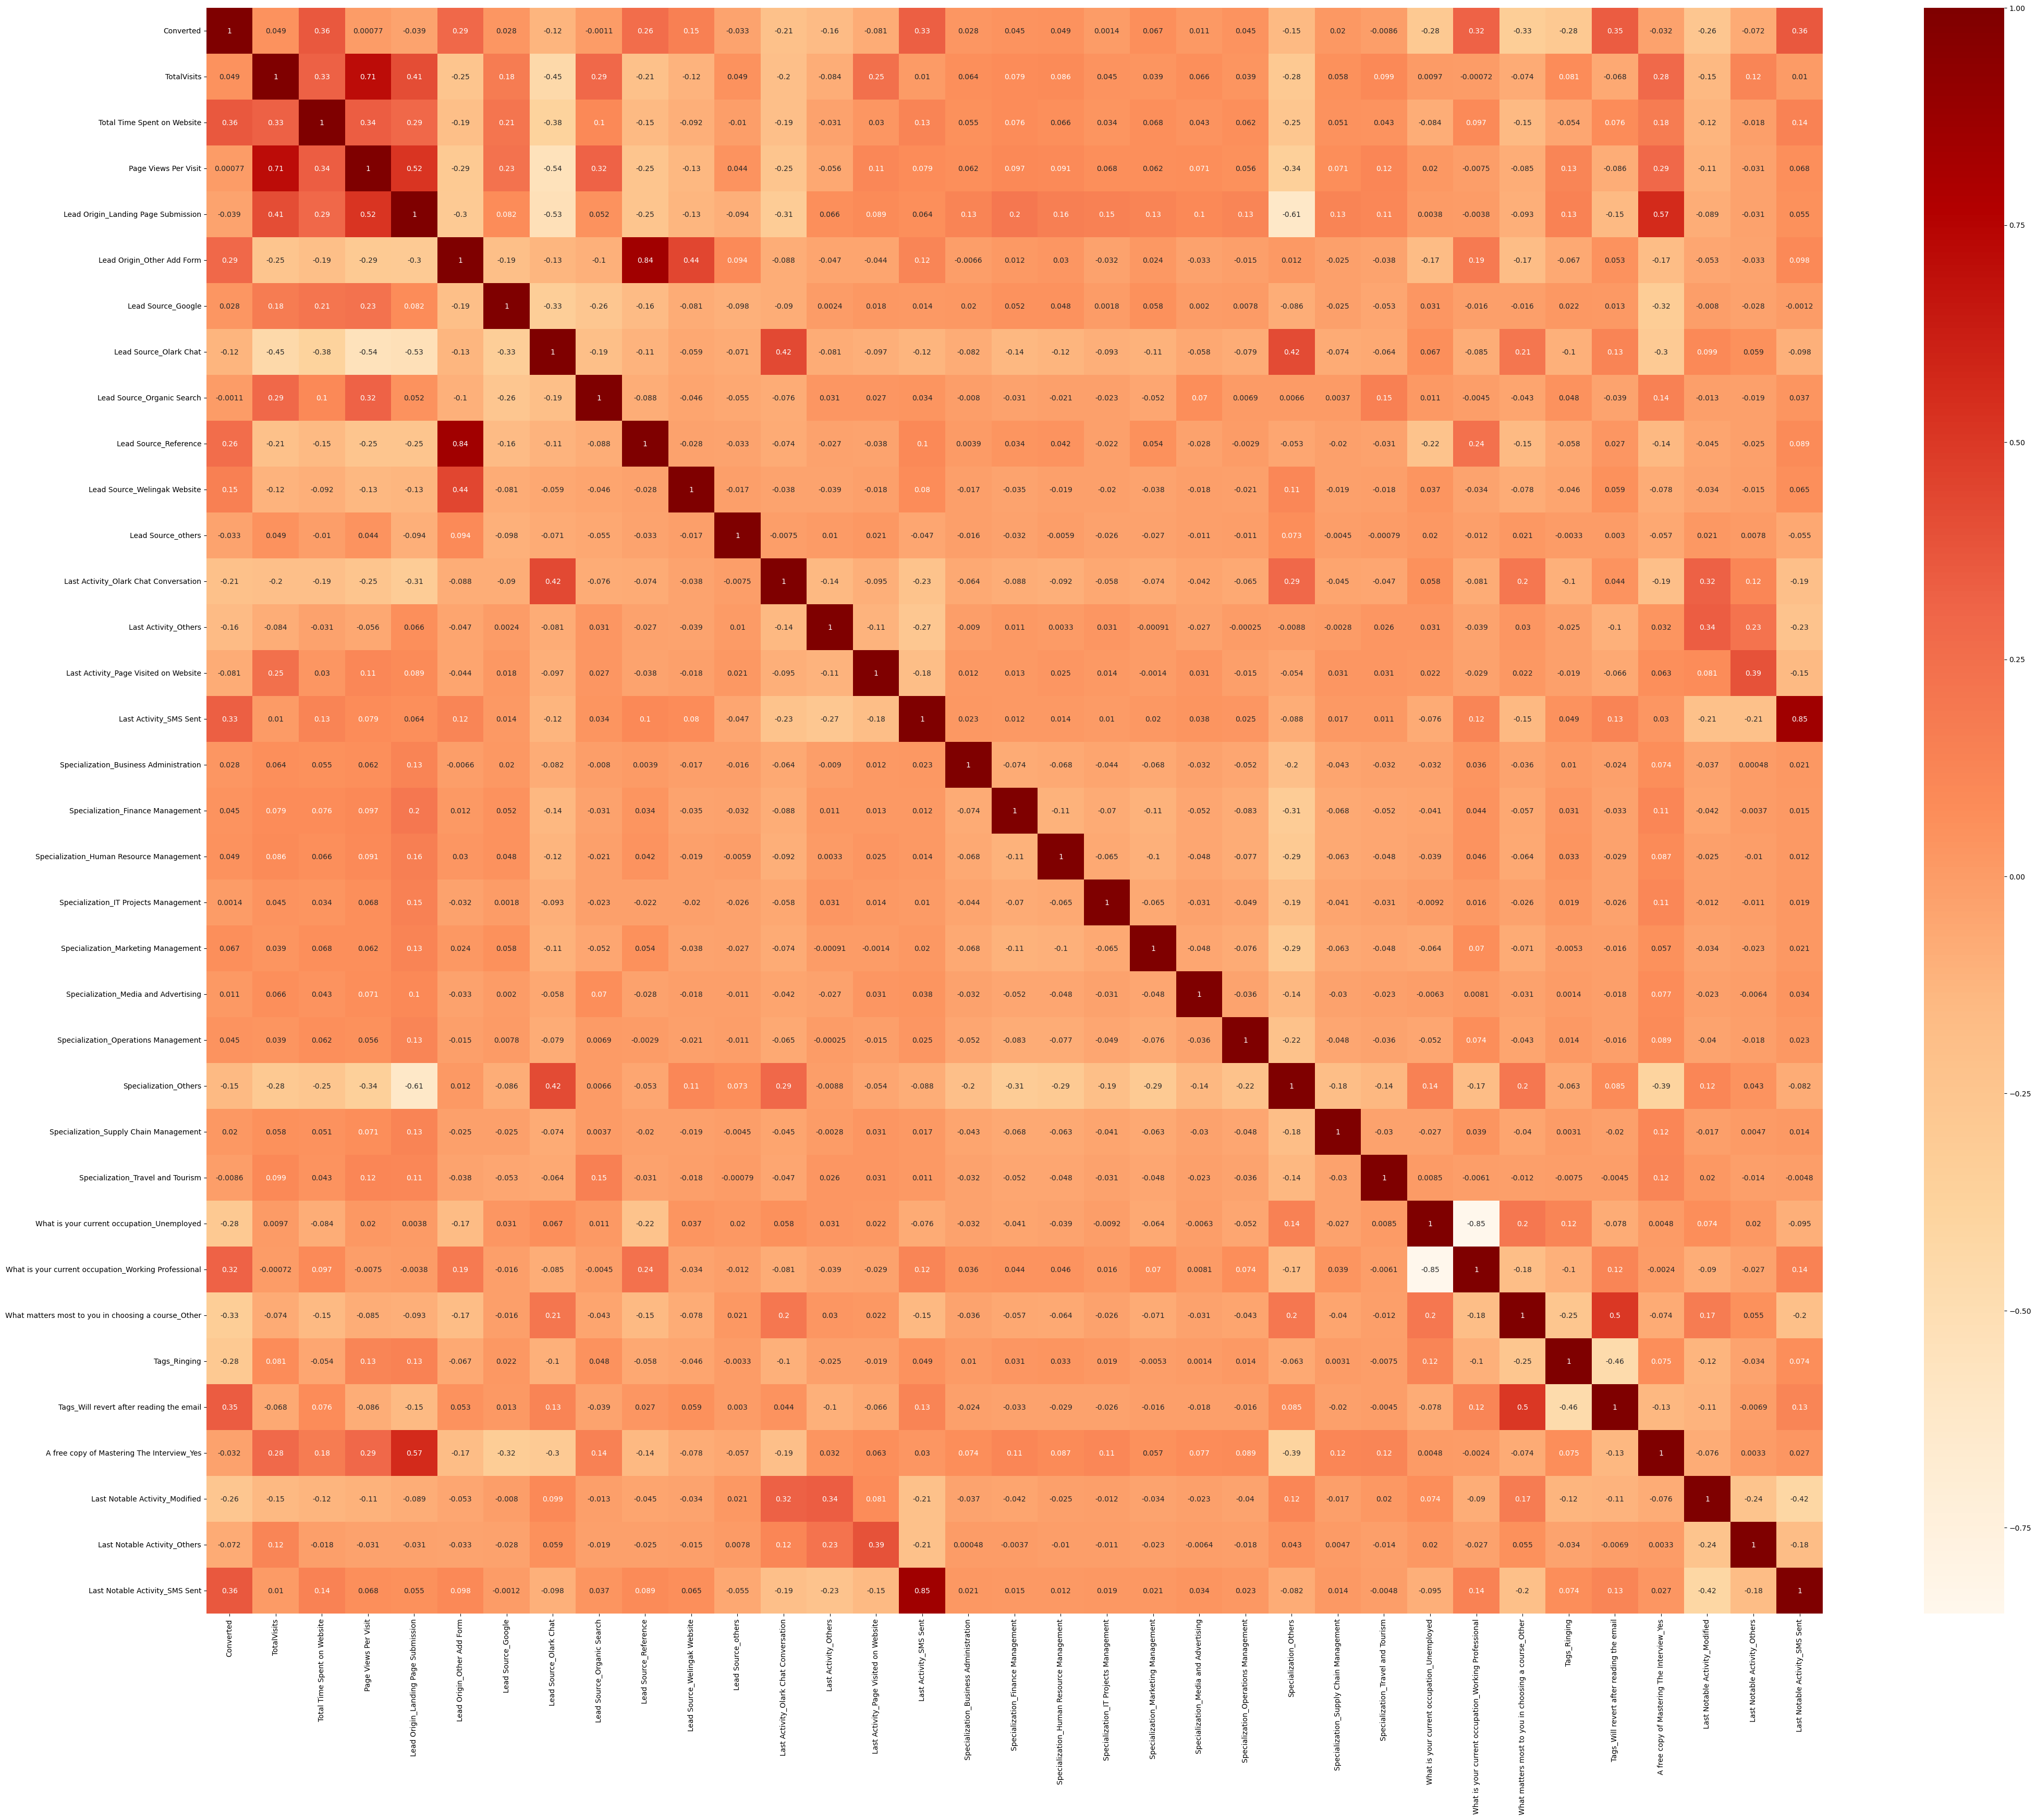

In [ ]:
#checking corelation
plt.figure(figsize = (50, 40))
sns.heatmap(df.corr(), annot = True, cmap="OrRd")
plt.show()

# Test-Train Split

In [156]:
# Import the required library

from sklearn.model_selection import train_test_split

In [157]:
# Put all the feature variables in X

x = df.drop(['Converted'], 1)
x.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Other Add Form  \
0                                    0                           0   
1                                    0                           0   
2                                    1                           0   
3                                    1                           0   
4                                    1                           0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Reference  Lead Source_Welingak Website  ...  \
0                      0                             0  ...   
1                      0                             0  ...   
2                      0                             0  ...   
3                      0                             0  ...   
4                      0                             0  ...   

   Specialization_Travel and Tourism  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   What matters most to you in choosing a course_Other  Tags_Ringing  \
0                                                  0               0   
1                                                  0               1   
2                                                  0               0   
3                                                  0               1   
4                                                  0               0   

   Tags_Will revert after reading the email  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         1   

   A free copy of Mastering The Interview_Yes  Last Notable Activity_Modified  \
0                                           0                               1   
1                                           0                               0   
2                                           1                               0   
3                                           0                               1   
4                                           0                               1   

   Last Notable Activity_Others  Last Notable Activity_SMS Sent  
0                             0                               0  
1                             0                               0  
2                             0  

In [158]:
# Converted is the target variable
y=df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [159]:
# split the date set to 70% and 30%
np.random.seed(0)
x_train, x_test,y_train,y_test  = train_test_split(x,y, train_size = 0.7,test_size = 0.3,random_state = 100)

In [160]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


x_train (6372, 34)
x_test (2731, 34)
y_train (6372,)
y_test (2731,)


# Rescaling using min max scaling method

In [161]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [162]:
x_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  6372.000000                  6372.000000           6372.000000   
mean      3.332863                   488.192404              2.340240   
std       3.264440                   548.061313              2.003457   
min       0.000000                     0.000000              0.000000   
25%       1.000000                     7.000000              1.000000   
50%       3.000000                   250.000000              2.000000   
75%       5.000000                   933.250000              3.250000   
max      17.000000                  2253.000000              9.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Other Add Form  \
count                          6372.000000                 6372.000000   
mean                              0.536566                    0.073603   
std                               0.498700                    0.261145   
min                               0.000000                    0.000000   
25%                               0.000000                    0.000000   
50%                               1.000000                    0.000000   
75%                               1.000000                    0.000000   
max                               1.000000                    1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         6372.000000             6372.000000                 6372.000000   
mean             0.316384                0.194758                    0.125235   
std              0.465101                0.396046                    0.331012   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Welingak Website  ...  \
count            6372.000000                   6372.000000  ...   
mean                0.052888                      0.015223  ...   
std                 0.223827                      0.122448  ...   
min                 0.000000                      0.000000  ...   
25%                 0.000000                      0.000000  ...   
50%                 0.000000                      0.000000  ...   
75%                 0.000000                      0.000000  ...   
max                 1.000000                      1.000000  ...   

       Specialization_Travel and Tourism  \
count                        6372.000000   
mean                            0.022128   
std                             0.147112   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       What is your current occupation_Unemployed  \
count                                 6372.000000   
mean                                     0.897677   
std                                      0.303096   
min                                      0.000000   
25%                                      1.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       What is your current occupation_Working Professional  \
count                                        6372.000000      
mean                                            0.075330      
std                                             0.263943      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                             

In [163]:
scaler = MinMaxScaler()

In [164]:
# Total Time Spent ,Page Views Per Visiton Website,TotalVisit data has high values compared to other columns .so we need to rescale this to fit this in the same range for further analysis
# Apply scaler() to all the columns except the encoding dummy variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [165]:
x_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  6372.000000                  6372.000000           6372.000000   
mean      0.196051                     0.216685              0.260027   
std       0.192026                     0.243258              0.222606   
min       0.000000                     0.000000              0.000000   
25%       0.058824                     0.003107              0.111111   
50%       0.176471                     0.110963              0.222222   
75%       0.294118                     0.414225              0.361111   
max       1.000000                     1.000000              1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Other Add Form  \
count                          6372.000000                 6372.000000   
mean                              0.536566                    0.073603   
std                               0.498700                    0.261145   
min                               0.000000                    0.000000   
25%                               0.000000                    0.000000   
50%                               1.000000                    0.000000   
75%                               1.000000                    0.000000   
max                               1.000000                    1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         6372.000000             6372.000000                 6372.000000   
mean             0.316384                0.194758                    0.125235   
std              0.465101                0.396046                    0.331012   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Welingak Website  ...  \
count            6372.000000                   6372.000000  ...   
mean                0.052888                      0.015223  ...   
std                 0.223827                      0.122448  ...   
min                 0.000000                      0.000000  ...   
25%                 0.000000                      0.000000  ...   
50%                 0.000000                      0.000000  ...   
75%                 0.000000                      0.000000  ...   
max                 1.000000                      1.000000  ...   

       Specialization_Travel and Tourism  \
count                        6372.000000   
mean                            0.022128   
std                             0.147112   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       What is your current occupation_Unemployed  \
count                                 6372.000000   
mean                                     0.897677   
std                                      0.303096   
min                                      0.000000   
25%                                      1.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       What is your current occupation_Working Professional  \
count                                        6372.000000      
mean                                            0.075330      
std                                             0.263943      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                             

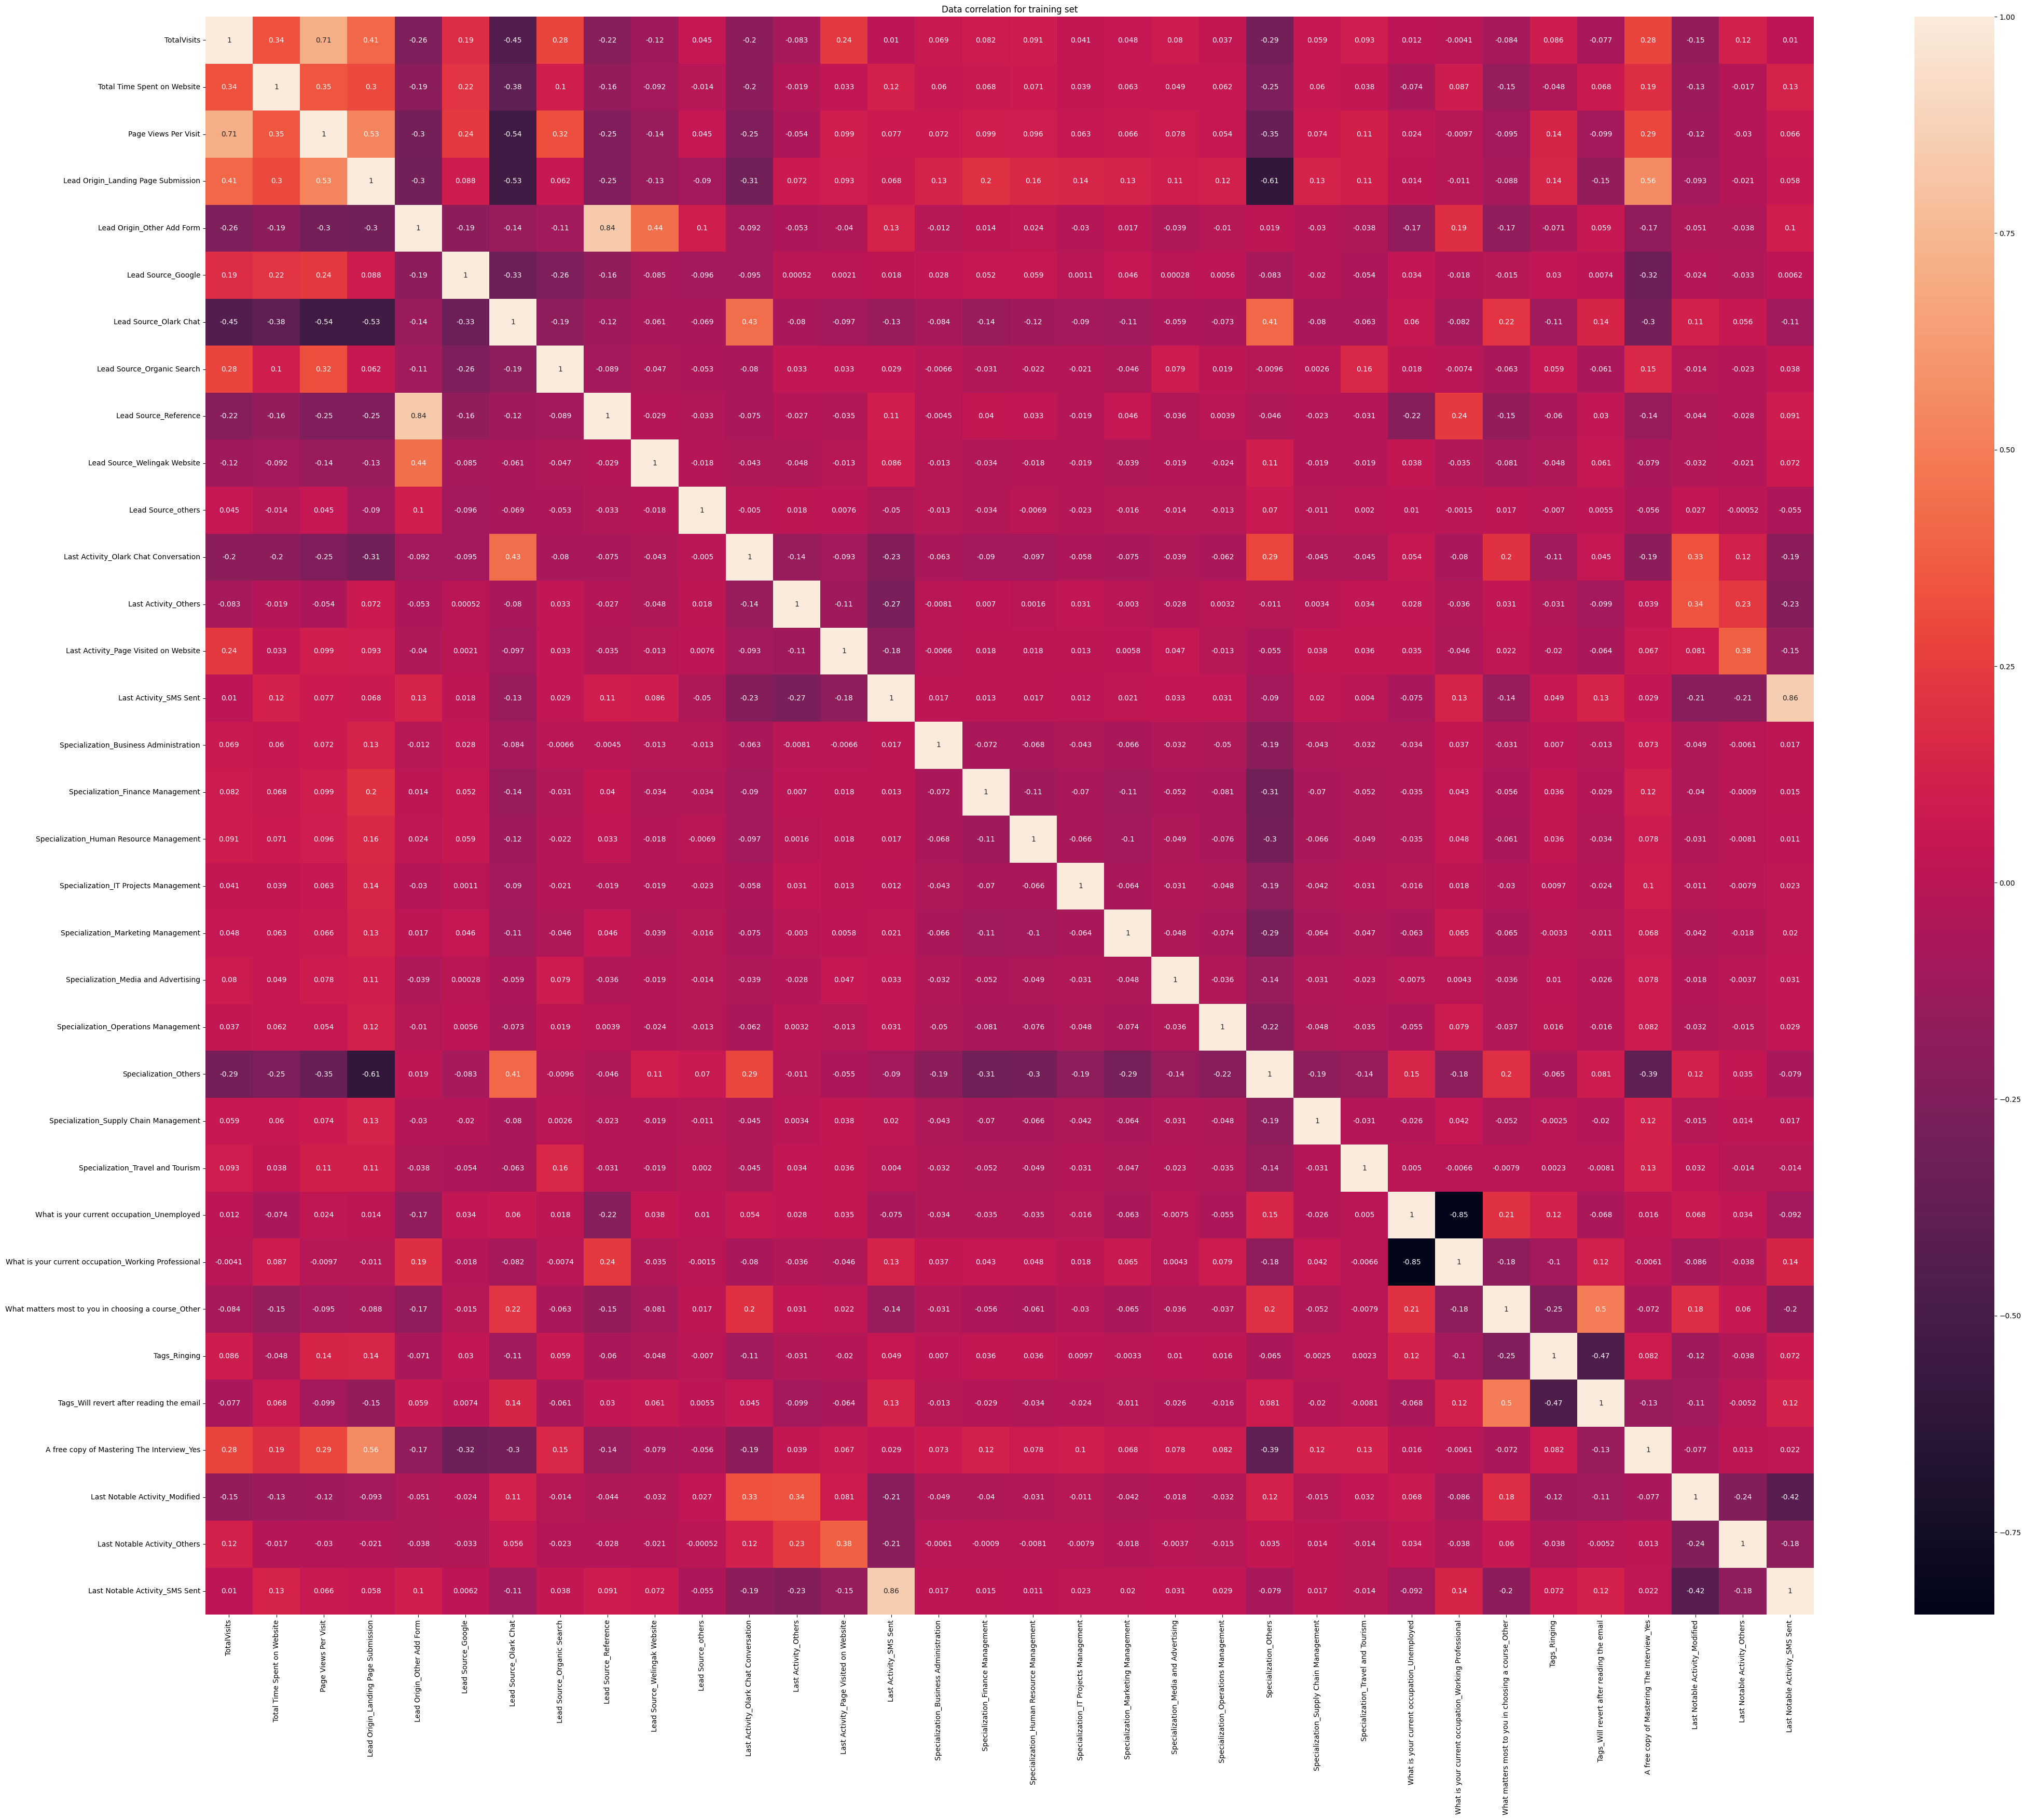

In [166]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 40))
sns.heatmap(x_train.corr(), annot = True)
plt.title("Data correlation for training set")
plt.show()

*.Analysis :Based on above heat map Multicollinearity is present in the data frame

# Checking the conversion rate

In [167]:
convert = sum(df['Converted'])/len(df['Converted'])*100
print("conversion rate is ",convert)

conversion rate is  37.92156431945513


In [168]:
x_train.shape

(6372, 34)

# Data Modelling

In [169]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lr = LogisticRegression()
rfe = RFE(estimator = lr,n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)


In [170]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False, False,  True])

In [171]:
# features have been selected by RFE

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Other Add Form', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 2),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', False, 7),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_Finance Management', False, 18),
 ('Specialization_Human Resource Management', False, 12),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_Marketing Management', False, 14),
 ('Specialization_Media and Advertising', False, 8),
 ('Specialization_Operations Management', False, 20),
 ('Sp

In [172]:
#Columns where RFE support is True
col_RFE_True = x_train.columns[rfe.support_]
col_RFE_True

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Other Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [173]:
#Columns where RFE not supported
col_RFE_False = x_train.columns[~rfe.support_]
col_RFE_False

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others'],
      dtype='object')

In [174]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col_RFE_True]

In [175]:
x_train_rfe1 = sm.add_constant(x_train_rfe)
x_train_rfe1.head()

const  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7963    1.0     0.588235                     0.821571              0.277778   
5521    1.0     0.411765                     0.013316              0.777778   
1951    1.0     0.176471                     0.661340              0.333333   
1553    1.0     0.235294                     0.534842              0.222222   
9170    1.0     0.000000                     0.000000              0.000000   

      Lead Origin_Other Add Form  Lead Source_Olark Chat  \
7963                           0                       0   
5521                           0                       0   
1951                           0                       0   
1553                           0                       0   
9170                           0                       1   

      Lead Source_Reference  Lead Source_Welingak Website  \
7963                      0                             0   
5521                      0                             0   
1951                      0                             0   
1553                      0                             0   
9170                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7963                                      0                     0   
5521                                      0                     0   
1951                                      0                     0   
1553                                      0                     0   
9170                                      0                     0   

      Specialization_Travel and Tourism  \
7963                                  0   
5521                                  0   
1951                                  0   
1553                                  0   
9170                                  0   

      What is your current occupation_Working Professional  \
7963                                                  1      
5521                                                  0      
1951                                                  0      
1553                                                  0      
9170                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
7963                                                  0               0   
5521                                                  1               0   
1951                                                  0               0   
1553                                                  0               0   
9170                                                  0               0   

      Tags_Will revert after reading the email  Last Notable Activity_SMS Sent  
7963                                         1                               0  
5521                                         1                               0  
1951                                         1                               0  
1553                                         1                               0  
9170                                         0                               0

In [176]:
model1 = sm.GLM(y_train, x_train_rfe1, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1790.8
Date:                Mon, 19 Jun 2023   Deviance:                       3581.6
Time:                        18:01:27   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5372
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8017      0.144    -19.460      0.000      -3.084      -2.520
TotalVisits                                              1.8751      0.302      6.219      0.000       1.284       2.466
Total Time Spent on Website                              4.4438      0.203     21.886      0.000       4.046       4.842
Page Views Per Visit                                    -0.9653      0.299     -3.224      0.001      -1.552      -0.378
Lead Origin_Other Add Form                              -0.0687      0.510     -0.135      0.893      -1.068       0.930
Lead Source_Olark Chat                                   1.0389      0.157      6.617      0.000       0.731       1.347
Lead Source_Reference                                    4.1941      0.564      7.433      0.000       3.088       5.300
Lead Source_Welingak Website                             5.6387      1.142      4.936      0.000       3.400       7.878
Last Activity_Olark Chat Conversation                   -1.5179      0.185     -8.189      0.000      -1.881      -1.155
Last Activity_Others                                    -0.7287      0.134     -5.425      0.000      -0.992      -0.465
Specialization_Travel and Tourism                       -0.8811      0.288     -3.055      0.002      -1.446      -0.316
What is your current occupation_Working Professional     1.7667      0.228      7.759      0.000       1.320       2.213
What matters most to you in choosing a course_Other     -3.1759      0.116    -27.360      0.000      -3.403      -2.948
Tags_Ringing                                            -3.2412      0.235    -13.777      0.000      -3.702      -2.780
Tags_Will revert after reading the email                 2.7407      0.111     24.604      0.000       2.522       2.959
Last Notable Activity_SMS Sent                           1.6861      0.113     14.919      0.000       1.465       1.908
========================================================================================================================
"""

In [177]:
# Getting the predicted values on train set
y_train_pred = res.predict(x_train_rfe1)
y_train_pred[:10].values.reshape(-1)

array([0.9979573 , 0.04083944, 0.94719967, 0.92706249, 0.1464439 ,
       0.09993583, 0.74410612, 0.52005178, 0.06524897, 0.64066276])

In [178]:
# creating a dataframe with the actual convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})

y_train_pred_final.head()

Converted  convert_prob
7963          1      0.997957
5521          0      0.040839
1951          1      0.947200
1553          1      0.927062
9170          0      0.146444

In [179]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  convert_prob  predicted
7963          1      0.997957          1
5521          0      0.040839          0
1951          1      0.947200          1
1553          1      0.927062          1
9170          0      0.146444          0

In [180]:
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3658  263]
 [ 418 2033]]


In [182]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8931261770244822


In [183]:
x_train_rfe1.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Other Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [184]:
x_train_rfe1.drop('const',axis=1,inplace=True)

In [185]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                          Lead Origin_Other Add Form  13.58
5                               Lead Source_Reference  10.76
2                                Page Views Per Visit   5.04
13           Tags_Will revert after reading the email   4.42
0                                         TotalVisits   4.19
6                        Lead Source_Welingak Website   3.81
11  What matters most to you in choosing a course_...   2.46
1                         Total Time Spent on Website   2.23
4                              Lead Source_Olark Chat   1.84
14                     Last Notable Activity_SMS Sent   1.60
7               Last Activity_Olark Chat Conversation   1.45
12                                       Tags_Ringing   1.38
10  What is your current occupation_Working Profes...   1.25
8                                Last Activity_Others   1.17
9                   Specialization_Travel and Tourism   1.04

In [186]:

x_train_rfe1.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Other Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [187]:
# remodel by dropping Lead Origin_Other Add Form because of high vif and p
x_train_rfe2 = x_train_rfe1.drop(["Lead Origin_Other Add Form"], axis = 1)

In [188]:
x_train_rfe2.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [189]:
#Build a model
x_train_rfe3 = sm.add_constant(x_train_rfe2)

model2 = sm.GLM(y_train,x_train_rfe3, family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1790.8
Date:                Mon, 19 Jun 2023   Deviance:                       3581.7
Time:                        18:01:28   Pearson chi2:                 1.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5372
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8049      0.142    -19.747      0.000      -3.083      -2.527
TotalVisits                                              1.8769      0.301      6.230      0.000       1.286       2.467
Total Time Spent on Website                              4.4458      0.202     21.958      0.000       4.049       4.843
Page Views Per Visit                                    -0.9610      0.298     -3.228      0.001      -1.545      -0.377
Lead Source_Olark Chat                                   1.0421      0.155      6.710      0.000       0.738       1.346
Lead Source_Reference                                    4.1284      0.284     14.538      0.000       3.572       4.685
Lead Source_Welingak Website                             5.5734      1.034      5.388      0.000       3.546       7.601
Last Activity_Olark Chat Conversation                   -1.5171      0.185     -8.189      0.000      -1.880      -1.154
Last Activity_Others                                    -0.7275      0.134     -5.429      0.000      -0.990      -0.465
Specialization_Travel and Tourism                       -0.8810      0.288     -3.055      0.002      -1.446      -0.316
What is your current occupation_Working Professional     1.7666      0.228      7.758      0.000       1.320       2.213
What matters most to you in choosing a course_Other     -3.1748      0.116    -27.426      0.000      -3.402      -2.948
Tags_Ringing                                            -3.2418      0.235    -13.782      0.000      -3.703      -2.781
Tags_Will revert after reading the email                 2.7393      0.111     24.706      0.000       2.522       2.957
Last Notable Activity_SMS Sent                           1.6869      0.113     14.946      0.000       1.466       1.908
========================================================================================================================
"""

In [190]:
# Getting the predicted values on train set
y_train_pred = res2.predict(x_train_rfe3)
y_train_pred[:10].values.reshape(-1)

array([0.99795566, 0.04086322, 0.9471247 , 0.9269183 , 0.14643485,
       0.09990287, 0.74442851, 0.51985457, 0.06530563, 0.63993604])

In [191]:
# creating a dataframe with the actual convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})

y_train_pred_final.head()

Converted  convert_prob
7963          1      0.997956
5521          0      0.040863
1951          1      0.947125
1553          1      0.926918
9170          0      0.146435

In [192]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  convert_prob  predicted
7963          1      0.997956          1
5521          0      0.040863          0
1951          1      0.947125          1
1553          1      0.926918          1
9170          0      0.146435          0

In [193]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Model2 Confusion matrix",confusion)
# Accuracy
print("Model2 Accuracy",100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Model2 Confusion matrix [[3658  263]
 [ 419 2032]]
Model2 Accuracy 89.29692404268675


In [194]:
x_train_rfe3.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [195]:
x_train_rfe3.drop('const',axis=1,inplace=True)

In [196]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                Page Views Per Visit  5.04
12           Tags_Will revert after reading the email  4.37
0                                         TotalVisits  4.19
10  What matters most to you in choosing a course_...  2.45
1                         Total Time Spent on Website  2.23
3                              Lead Source_Olark Chat  1.84
13                     Last Notable Activity_SMS Sent  1.60
6               Last Activity_Olark Chat Conversation  1.45
11                                       Tags_Ringing  1.37
9   What is your current occupation_Working Profes...  1.25
4                               Lead Source_Reference  1.21
7                                Last Activity_Others  1.17
5                        Lead Source_Welingak Website  1.07
8                   Specialization_Travel and Tourism  1.04

In [197]:
# Drop Page Views Per Visit due to high VIF

In [198]:
x_train_rfe3.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [199]:
x_train_rfe3.drop('Page Views Per Visit',axis=1,inplace=True)

In [200]:
x_train_rfe3.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [201]:
#Build a model
x_train_rfe4 = sm.add_constant(x_train_rfe3)

model3 = sm.GLM(y_train,x_train_rfe4, family = sm.families.Binomial())
res2 = model3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1796.1
Date:                Mon, 19 Jun 2023   Deviance:                       3592.2
Time:                        18:01:31   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9866      0.131    -22.741      0.000      -3.244      -2.729
TotalVisits                                              1.3640      0.258      5.288      0.000       0.858       1.870
Total Time Spent on Website                              4.4313      0.202     21.946      0.000       4.036       4.827
Lead Source_Olark Chat                                   1.2261      0.145      8.466      0.000       0.942       1.510
Lead Source_Reference                                    4.3104      0.279     15.424      0.000       3.763       4.858
Lead Source_Welingak Website                             5.7573      1.033      5.575      0.000       3.733       7.782
Last Activity_Olark Chat Conversation                   -1.5047      0.185     -8.135      0.000      -1.867      -1.142
Last Activity_Others                                    -0.7100      0.134     -5.302      0.000      -0.972      -0.447
Specialization_Travel and Tourism                       -0.9330      0.288     -3.240      0.001      -1.497      -0.369
What is your current occupation_Working Professional     1.7694      0.228      7.752      0.000       1.322       2.217
What matters most to you in choosing a course_Other     -3.1640      0.115    -27.399      0.000      -3.390      -2.938
Tags_Ringing                                            -3.2624      0.235    -13.884      0.000      -3.723      -2.802
Tags_Will revert after reading the email                 2.7229      0.111     24.634      0.000       2.506       2.940
Last Notable Activity_SMS Sent                           1.6634      0.112     14.833      0.000       1.444       1.883
========================================================================================================================
"""

In [202]:
# Getting the predicted values on train set
y_train_pred = res2.predict(x_train_rfe4)
y_train_pred[:10].values.reshape(-1)

array([0.9973978 , 0.05694672, 0.94822528, 0.91889071, 0.1467263 ,
       0.0996058 , 0.81340019, 0.47752642, 0.09055312, 0.62906036])

In [203]:
# creating a dataframe with the actual convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})

y_train_pred_final.head()

Converted  convert_prob
7963          1      0.997398
5521          0      0.056947
1951          1      0.948225
1553          1      0.918891
9170          0      0.146726

In [204]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  convert_prob  predicted
7963          1      0.997398          1
5521          0      0.056947          0
1951          1      0.948225          1
1553          1      0.918891          1
9170          0      0.146726          0

In [205]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(" model3 confusion matrix",confusion)
# Accuracy
print("Accuracy model3",100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

 model3 confusion matrix [[3663  258]
 [ 421 2030]]
Accuracy model3 89.34400502197113


In [206]:
x_train_rfe4.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [207]:
x_train_rfe4.drop('const',axis=1,inplace=True)

In [208]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11           Tags_Will revert after reading the email  4.28
9   What matters most to you in choosing a course_...  2.45
0                                         TotalVisits  2.17
1                         Total Time Spent on Website  2.17
2                              Lead Source_Olark Chat  1.77
12                     Last Notable Activity_SMS Sent  1.57
5               Last Activity_Olark Chat Conversation  1.44
10                                       Tags_Ringing  1.29
8   What is your current occupation_Working Profes...  1.25
3                               Lead Source_Reference  1.20
6                                Last Activity_Others  1.16
4                        Lead Source_Welingak Website  1.07
7                   Specialization_Travel and Tourism  1.03

In [209]:
# Drop Tags_Will revert after reading the email due to high VIF
x_train_rfe4.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [210]:
x_train_rfe4.drop('Tags_Will revert after reading the email',axis=1,inplace=True)

In [211]:
#Build a model
x_train_rfe5 = sm.add_constant(x_train_rfe4)

model4 = sm.GLM(y_train,x_train_rfe5, family = sm.families.Binomial())
res3 = model4.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2166.5
Date:                Mon, 19 Jun 2023   Deviance:                       4333.1
Time:                        18:01:32   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4793
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8838      0.105    -17.876      0.000      -2.090      -1.677
TotalVisits                                              1.1768      0.233      5.059      0.000       0.721       1.633
Total Time Spent on Website                              4.6898      0.187     25.090      0.000       4.323       5.056
Lead Source_Olark Chat                                   1.5660      0.128     12.202      0.000       1.314       1.817
Lead Source_Reference                                    4.1108      0.267     15.401      0.000       3.588       4.634
Lead Source_Welingak Website                             5.8212      1.014      5.742      0.000       3.834       7.808
Last Activity_Olark Chat Conversation                   -1.5951      0.168     -9.517      0.000      -1.924      -1.267
Last Activity_Others                                    -0.8686      0.120     -7.223      0.000      -1.104      -0.633
Specialization_Travel and Tourism                       -0.7220      0.257     -2.805      0.005      -1.226      -0.218
What is your current occupation_Working Professional     2.0957      0.199     10.555      0.000       1.707       2.485
What matters most to you in choosing a course_Other     -1.7484      0.093    -18.867      0.000      -1.930      -1.567
Tags_Ringing                                            -4.5702      0.230    -19.869      0.000      -5.021      -4.119
Last Notable Activity_SMS Sent                           1.8636      0.100     18.680      0.000       1.668       2.059
========================================================================================================================
"""

In [212]:
# Getting the predicted values on train set
y_train_pred = res3.predict(x_train_rfe5)
y_train_pred[:10].values.reshape(-1)

array([0.99148323, 0.04372555, 0.80619254, 0.71124434, 0.42121323,
       0.1124283 , 0.51547438, 0.455561  , 0.21852433, 0.25405093])

In [213]:
# creating a dataframe with the actual convert flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'convert_prob': y_train_pred})

y_train_pred_final.head()

Converted  convert_prob
7963          1      0.991483
5521          0      0.043726
1951          1      0.806193
1553          1      0.711244
9170          0      0.421213

In [214]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.convert_prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  convert_prob  predicted
7963          1      0.991483          1
5521          0      0.043726          0
1951          1      0.806193          1
1553          1      0.711244          1
9170          0      0.421213          0

In [215]:
#Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("model 4 confusion matrix ",confusion)

model 4 confusion matrix  [[3534  387]
 [ 553 1898]]


In [216]:
# Accuracy
print("model 4 Accuracy ",100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

model 4 Accuracy  85.24795982423102


In [217]:
x_train_rfe5.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [218]:
x_train_rfe5.drop('const',axis=1,inplace=True)

In [219]:
# Create a dataframe thdt will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.07
1                         Total Time Spent on Website  1.95
2                              Lead Source_Olark Chat  1.60
9   What matters most to you in choosing a course_...  1.50
5               Last Activity_Olark Chat Conversation  1.44
11                     Last Notable Activity_SMS Sent  1.42
8   What is your current occupation_Working Profes...  1.21
10                                       Tags_Ringing  1.18
6                                Last Activity_Others  1.16
3                               Lead Source_Reference  1.13
7                   Specialization_Travel and Tourism  1.03
4                        Lead Source_Welingak Website  1.02

In [220]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [221]:
# Let's see the sensitivity,specificity of our logistic regression model
# false postive rate - predicting convert when customer does not have converted
print("Final model evaluations")
print('-----------------------------------')
print("Sensitivity",100*TP / float(TP+FN))
print("specificity",100*TN / float(TN+FP))
print("false postive rate",100* FP/ float(TN+FP))
print("positive predictive value ",100*TP / float(TP+FP))
print("Negative predictive value ",100*TN / float(TN+ FN))

Final model evaluations
-----------------------------------
Sensitivity 77.43778049775602
specificity 90.1300688599847
false postive rate 9.869931140015302
positive predictive value  83.06345733041576
Negative predictive value  86.46929287986298


# Plotting the ROC Curve (Optimal curve )

In [222]:
# ROC CURVE
from sklearn.metrics import roc_curve, roc_auc_score

In [223]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [224]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob, drop_intermediate=False)

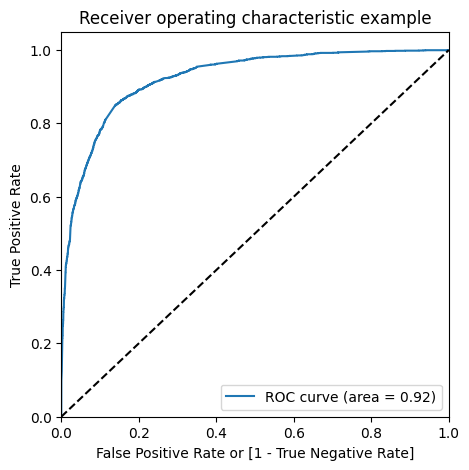

In [225]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

# Finding optimal cutoff point

In [226]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.convert_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

Converted  convert_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7963          1      0.991483          1    1    1    1    1    1    1    1   
5521          0      0.043726          0    1    0    0    0    0    0    0   
1951          1      0.806193          1    1    1    1    1    1    1    1   
1553          1      0.711244          1    1    1    1    1    1    1    1   
9170          0      0.421213          0    1    1    1    1    1    0    0   

      0.7  0.8  0.9  
7963    1    1    1  
5521    0    0    0  
1951    1    1    0  
1553    1    0    0  
9170    0    0    0

In [227]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.701664  0.971440  0.533027
0.2   0.2  0.797081  0.926153  0.716399
0.3   0.3  0.837414  0.883721  0.808467
0.4   0.4  0.854049  0.852713  0.854884
0.5   0.5  0.852480  0.774378  0.901301
0.6   0.6  0.844005  0.719298  0.921959
0.7   0.7  0.830822  0.639739  0.950268
0.8   0.8  0.808067  0.544268  0.972966
0.9   0.9  0.760829  0.396165  0.988778


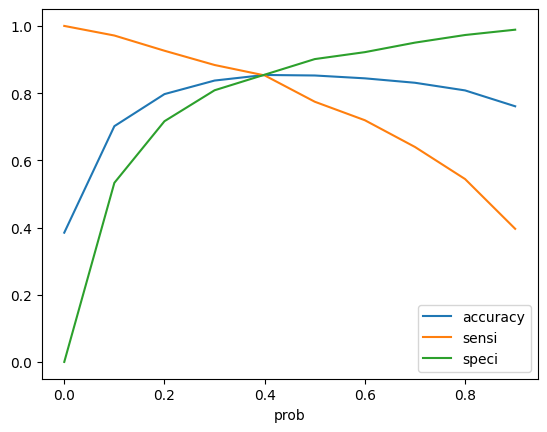

In [228]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 Analysis:From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [229]:
y_train_pred_final['final_predicted'] = y_train_pred_final.convert_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  convert_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7963          1      0.991483          1    1    1    1    1    1    1    1   
5521          0      0.043726          0    1    0    0    0    0    0    0   
1951          1      0.806193          1    1    1    1    1    1    1    1   
1553          1      0.711244          1    1    1    1    1    1    1    1   
9170          0      0.421213          0    1    1    1    1    1    0    0   

      0.7  0.8  0.9  final_predicted  
7963    1    1    1                1  
5521    0    0    0                0  
1951    1    1    0                1  
1553    1    0    0                1  
9170    0    0    0                1

In [230]:
# Now let us calculate the lead score by round off convert probality

y_train_pred_final['lead_score'] = y_train_pred_final.convert_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  convert_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
7963          1      0.991483          1    1    1    1    1    1    1    1   
5521          0      0.043726          0    1    0    0    0    0    0    0   
1951          1      0.806193          1    1    1    1    1    1    1    1   
1553          1      0.711244          1    1    1    1    1    1    1    1   
9170          0      0.421213          0    1    1    1    1    1    0    0   
5097          0      0.112428          0    1    1    0    0    0    0    0   
8953          1      0.515474          1    1    1    1    1    1    1    0   
308           0      0.455561          0    1    1    1    1    1    0    0   
5520          0      0.218524          0    1    1    1    0    0    0    0   
1045          1      0.254051          0    1    1    1    0    0    0    0   
5246          0      0.027894          0    1    0    0    0    0    0    0   
3273          0      0.128655          0    1    1    0    0    0    0    0   
5760          0      0.002354          0    1    0    0    0    0    0    0   
7389          0      0.099658          0    1    0    0    0    0    0    0   
2903          0      0.000805          0    1    0    0    0    0    0    0   
4198          1      0.896387          1    1    1    1    1    1    1    1   
42            0      0.003356          0    1    0    0    0    0    0    0   
249           1      0.907729          1    1    1    1    1    1    1    1   
8533          0      0.191974          0    1    1    0    0    0    0    0   
9161          0      0.063338          0    1    0    0    0    0    0    0   

      0.7  0.8  0.9  final_predicted  lead_score  
7963    1    1    1                1          99  
5521    0    0    0                0           4  
1951    1    1    0                1          81  
1553    1    0    0                1          71  
9170    0    0    0                1          42  
5097    0    0    0                0          11  
8953    0    0    0                1          52  
308     0    0    0                1          46  
5520    0    0    0                0          22  
1045    0    0    0                0          25  
5246    0    0    0                0           3  
3273    0    0    0                0          13  
5760    0    0    0                0           0  
7389    0    0    0                0          10  
2903    0    0    0                0           0  
4198    1    1    0                1          90  
42      0    0    0                0           0  
249     1    1    1                1          91  
8533    0    0    0                0          19  
9161    0    0    0                0           6

In [231]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2090
0     361
Name: final_predicted, dtype: int64

In [232]:
# check the precentage of final_predicted conversions

print("final_predicted conversions",100*2090/float(2090+361))

final_predicted conversions 85.27131782945736


In [233]:
# final_predicted conversions is 85% hence this is a good model

In [234]:
# Let's check the overall accuracy.
print("accuracy",100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

accuracy 85.40489642184558


In [235]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("confusion2",confusion2)

confusion2 [[3352  569]
 [ 361 2090]]


In [236]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity,specificity of our logistic regression model,false postive rate - predicting convert when customer does not have converted
print("Sensitivity       ",100*TP / float(TP+FN))
print("specificity       ",100*TN / float(TN+FP))
print("false postive rate",100*FP/ float(TN+FP))
print("positive predictive value ",100*TP / float(TP+FP))
print("Negative predictive value ",100*TN / float(TN+ FN))

Sensitivity        85.27131782945736
specificity        85.48839581739352
false postive rate 14.511604182606478
positive predictive value  78.60097781120722
Negative predictive value  90.27740371667116


# Precision and Recall

In [239]:
print("accuracy_score",metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final.predicted))
confusion1=metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.predicted)
print("confusion_matrix\n",confusion1)

accuracy_score 0.8524795982423101
confusion_matrix
 [[3534  387]
 [ 553 1898]]


In [240]:
# Let's evaluate the other metrics as well

TP = confusion1[1,1] # true positive
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [241]:
print("sensitivity",TP/(TP+FN))
print("specificity",TN/(TN+FP))

sensitivity 0.7743778049775601
specificity 0.901300688599847


In [242]:
from sklearn.metrics import precision_score, recall_score
print("precision score",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("recall score",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

precision score 0.8306345733041576
recall score 0.7743778049775601


In [243]:
# Precision and Recall Tradoff

In [244]:
from sklearn.metrics import precision_recall_curve
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.convert_prob)

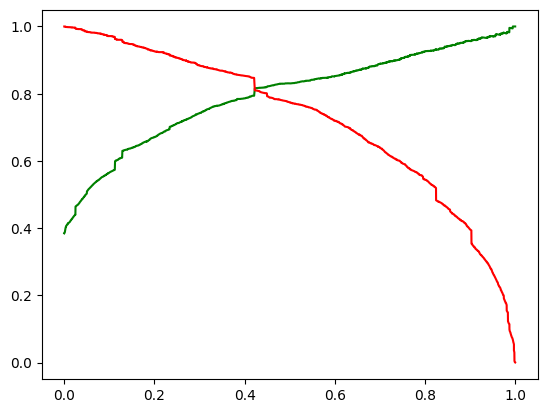

In [245]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Prediction on Test Set

In [246]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

x_test[num_vars] = scaler.fit_transform(x_test[num_vars])

In [247]:
x_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3497     0.000000                     0.000000              0.000000   
4044     0.000000                     0.000000              0.000000   
7200     0.058824                     0.066021              0.111111   
1183     0.000000                     0.000000              0.000000   
8216     0.411765                     0.015405              0.155556   

      Lead Origin_Landing Page Submission  Lead Origin_Other Add Form  \
3497                                    0                           1   
4044                                    0                           0   
7200                                    0                           0   
1183                                    0                           0   
8216                                    0                           0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
3497                   0                       0                           0   
4044                   0                       1                           0   
7200                   1                       0                           0   
1183                   0                       1                           0   
8216                   1                       0                           0   

      Lead Source_Reference  Lead Source_Welingak Website  ...  \
3497                      1                             0  ...   
4044                      0                             0  ...   
7200                      0                             0  ...   
1183                      0                             0  ...   
8216                      0                             0  ...   

      Specialization_Travel and Tourism  \
3497                                  0   
4044                                  0   
7200                                  0   
1183                                  0   
8216                                  0   

      What is your current occupation_Unemployed  \
3497                                           1   
4044                                           1   
7200                                           1   
1183                                           1   
8216                                           1   

      What is your current occupation_Working Professional  \
3497                                                  0      
4044                                                  0      
7200                                                  0      
1183                                                  0      
8216                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
3497                                                  0               0   
4044                                                  0               0   
7200                                                  0               0   
1183                                                  0               0   
8216                                                  1               0   

      Tags_Will revert after reading the email  \
3497                                         1   
4044                                         1   
7200                                         0   
1183                                         0   
8216                                         1   

      A free copy of Mastering The Interview_Yes  \
3497                                           0   
4044                                           0   
7200                                           0   
1183                                           0   
8216                                           0   

      Last Notable Activity_Modified  Last Notable Activity_Others  \
3497                               0                             0   
4044                               0                             0   
7200                               1

In [248]:
x_test.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  2731.000000                  2731.000000           2731.000000   
mean      0.197859                     0.208391              0.259995   
std       0.188648                     0.237456              0.214431   
min       0.000000                     0.000000              0.000000   
25%       0.058824                     0.009023              0.111111   
50%       0.176471                     0.105194              0.222222   
75%       0.294118                     0.392826              0.333333   
max       1.000000                     1.000000              1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Other Add Form  \
count                          2731.000000                 2731.000000   
mean                              0.536800                    0.061882   
std                               0.498735                    0.240985   
min                               0.000000                    0.000000   
25%                               0.000000                    0.000000   
50%                               1.000000                    0.000000   
75%                               1.000000                    0.000000   
max                               1.000000                    1.000000   

       Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
count         2731.000000             2731.000000                 2731.000000   
mean             0.313804                0.188209                    0.130355   
std              0.464123                0.390951                    0.336755   
min              0.000000                0.000000                    0.000000   
25%              0.000000                0.000000                    0.000000   
50%              0.000000                0.000000                    0.000000   
75%              1.000000                0.000000                    0.000000   
max              1.000000                1.000000                    1.000000   

       Lead Source_Reference  Lead Source_Welingak Website  ...  \
count            2731.000000                   2731.000000  ...   
mean                0.045771                      0.011717  ...   
std                 0.209026                      0.107630  ...   
min                 0.000000                      0.000000  ...   
25%                 0.000000                      0.000000  ...   
50%                 0.000000                      0.000000  ...   
75%                 0.000000                      0.000000  ...   
max                 1.000000                      1.000000  ...   

       Specialization_Travel and Tourism  \
count                        2731.000000   
mean                            0.022336   
std                             0.147801   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             1.000000   

       What is your current occupation_Unemployed  \
count                                 2731.000000   
mean                                     0.901501   
std                                      0.298042   
min                                      0.000000   
25%                                      1.000000   
50%                                      1.000000   
75%                                      1.000000   
max                                      1.000000   

       What is your current occupation_Working Professional  \
count                                        2731.000000      
mean                                            0.074332      
std                                             0.262358      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                             

In [249]:
# list down and check variables of final model
var_final = list(res3.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(res3.params,3))

Final Selected Variables: ['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Others', 'Specialization_Travel and Tourism', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Other', 'Tags_Ringing', 'Last Notable Activity_SMS Sent']

Coefficent for the variables are:
const                                                  -1.884
TotalVisits                                             1.177
Total Time Spent on Website                             4.690
Lead Source_Olark Chat                                  1.566
Lead Source_Reference                                   4.111
Lead Source_Welingak Website                            5.821
Last Activity_Olark Chat Conversation                  -1.595
Last Activity_Others                                   -0.869
Specialization_Travel and Tourism                 

In [250]:
# select final variables from X_test
X_test_sm = x_test[var_final]
X_test_sm.head()

TotalVisits  Total Time Spent on Website  Lead Source_Olark Chat  \
3497     0.000000                     0.000000                       0   
4044     0.000000                     0.000000                       1   
7200     0.058824                     0.066021                       0   
1183     0.000000                     0.000000                       1   
8216     0.411765                     0.015405                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3497                      1                             0   
4044                      0                             0   
7200                      0                             0   
1183                      0                             0   
8216                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3497                                      0                     0   
4044                                      0                     0   
7200                                      0                     1   
1183                                      0                     1   
8216                                      0                     0   

      Specialization_Travel and Tourism  \
3497                                  0   
4044                                  0   
7200                                  0   
1183                                  0   
8216                                  0   

      What is your current occupation_Working Professional  \
3497                                                  0      
4044                                                  0      
7200                                                  0      
1183                                                  0      
8216                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
3497                                                  0               0   
4044                                                  0               0   
7200                                                  0               0   
1183                                                  0               0   
8216                                                  1               0   

      Last Notable Activity_SMS Sent  
3497                               0  
4044                               1  
7200                               0  
1183                               0  
8216                               0

In [251]:
X_test_sm.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Ringing',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [252]:
X_train_sm = sm.add_constant(X_test_sm)

In [253]:
X_train_sm.head()

const  TotalVisits  Total Time Spent on Website  Lead Source_Olark Chat  \
3497    1.0     0.000000                     0.000000                       0   
4044    1.0     0.000000                     0.000000                       1   
7200    1.0     0.058824                     0.066021                       0   
1183    1.0     0.000000                     0.000000                       1   
8216    1.0     0.411765                     0.015405                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
3497                      1                             0   
4044                      0                             0   
7200                      0                             0   
1183                      0                             0   
8216                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
3497                                      0                     0   
4044                                      0                     0   
7200                                      0                     1   
1183                                      0                     1   
8216                                      0                     0   

      Specialization_Travel and Tourism  \
3497                                  0   
4044                                  0   
7200                                  0   
1183                                  0   
8216                                  0   

      What is your current occupation_Working Professional  \
3497                                                  0      
4044                                                  0      
7200                                                  0      
1183                                                  0      
8216                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
3497                                                  0               0   
4044                                                  0               0   
7200                                                  0               0   
1183                                                  0               0   
8216                                                  1               0   

      Last Notable Activity_SMS Sent  
3497                               0  
4044                               1  
7200                               0  
1183                               0  
8216                               0

In [254]:
x_train_rfe5.head()

TotalVisits  Total Time Spent on Website  Lead Source_Olark Chat  \
7963     0.588235                     0.821571                       0   
5521     0.411765                     0.013316                       0   
1951     0.176471                     0.661340                       0   
1553     0.235294                     0.534842                       0   
9170     0.000000                     0.000000                       1   

      Lead Source_Reference  Lead Source_Welingak Website  \
7963                      0                             0   
5521                      0                             0   
1951                      0                             0   
1553                      0                             0   
9170                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7963                                      0                     0   
5521                                      0                     0   
1951                                      0                     0   
1553                                      0                     0   
9170                                      0                     0   

      Specialization_Travel and Tourism  \
7963                                  0   
5521                                  0   
1951                                  0   
1553                                  0   
9170                                  0   

      What is your current occupation_Working Professional  \
7963                                                  1      
5521                                                  0      
1951                                                  0      
1553                                                  0      
9170                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
7963                                                  0               0   
5521                                                  1               0   
1951                                                  0               0   
1553                                                  0               0   
9170                                                  0               0   

      Last Notable Activity_SMS Sent  
7963                               0  
5521                               0  
1951                               0  
1553                               0  
9170                               0

In [255]:
x_train_rfe5.head()

TotalVisits  Total Time Spent on Website  Lead Source_Olark Chat  \
7963     0.588235                     0.821571                       0   
5521     0.411765                     0.013316                       0   
1951     0.176471                     0.661340                       0   
1553     0.235294                     0.534842                       0   
9170     0.000000                     0.000000                       1   

      Lead Source_Reference  Lead Source_Welingak Website  \
7963                      0                             0   
5521                      0                             0   
1951                      0                             0   
1553                      0                             0   
9170                      0                             0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
7963                                      0                     0   
5521                                      0                     0   
1951                                      0                     0   
1553                                      0                     0   
9170                                      0                     0   

      Specialization_Travel and Tourism  \
7963                                  0   
5521                                  0   
1951                                  0   
1553                                  0   
9170                                  0   

      What is your current occupation_Working Professional  \
7963                                                  1      
5521                                                  0      
1951                                                  0      
1553                                                  0      
9170                                                  0      

      What matters most to you in choosing a course_Other  Tags_Ringing  \
7963                                                  0               0   
5521                                                  1               0   
1951                                                  0               0   
1553                                                  0               0   
9170                                                  0               0   

      Last Notable Activity_SMS Sent  
7963                               0  
5521                               0  
1951                               0  
1553                               0  
9170                               0

In [256]:
 # predict test dataset
y_test_pred = res3.predict(X_train_sm)

In [257]:


y_test_pred[:10].values.reshape(-1)

array([0.90264874, 0.8243119 , 0.08521234, 0.23389741, 0.0441371 ,
       0.42121323, 0.06029556, 0.94058843, 0.05045926, 0.95560096])

In [258]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [259]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [260]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

Converted         0
3497          1  0.902649
4044          1  0.824312
7200          0  0.085212
1183          0  0.233897
8216          0  0.044137

In [261]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'convert_prob'})

In [262]:
y_pred_final.head()

Converted  convert_prob
3497          1      0.902649
4044          1      0.824312
7200          0      0.085212
1183          0      0.233897
8216          0      0.044137

In [263]:
y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x > 0.40 else 0)

In [264]:
y_pred_final.head()

Converted  convert_prob  final_predicted
3497          1      0.902649                1
4044          1      0.824312                1
7200          0      0.085212                0
1183          0      0.233897                0
8216          0      0.044137                0

In [265]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.convert_prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  convert_prob  final_predicted  lead_score
3497          1      0.902649                1          90
4044          1      0.824312                1          82
7200          0      0.085212                0           9
1183          0      0.233897                0          23
8216          0      0.044137                0           4

In [266]:
# checking if cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    843
0    158
Name: final_predicted, dtype: int64

In [267]:
# check the precentage of final_predicted conversions on test data
print("Test data final_predicted conversions on test data",100*843/float(843+158))


Test data final_predicted conversions on test data 84.21578421578421


In [268]:
print("accuracy",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print("confusion of test data",confusion2)
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity,specificity,false postive rate - predicting convert when customer does not have converted of our logistic regression model

print("Test data Sensitivity       ",100*TP / float(TP+FN))
print("Test data specificity       ",100*TN / float(TN+FP))
print("Test data false postive rate",100*FP/ float(TN+FP))
print("Test data positive predictive value ",100*TP / float(TP+FP))
print("Test data Negative predictive value ",100*TN / float(TN+ FN))

accuracy 0.8524350054924936
confusion of test data [[1485  245]
 [ 158  843]]
Test data Sensitivity        84.21578421578421
Test data specificity        85.83815028901734
Test data false postive rate 14.16184971098266
Test data positive predictive value  77.48161764705883
Test data Negative predictive value  90.38344491783323


In [269]:
train_result = dict([
    ("final_predicted conversions", 85.27),
    ("false positive rate", 14.51),
    ("Accuracy", 85.40),
    ("Sensitivity", 85.27),
    ("specificity", 85.48),
])

In [270]:
test_result = dict([
    ("final_predicted conversions", 84.21),
    ("false positive rate", 14.16),
    ("Accuracy", 85.24),
    ("Sensitivity", 84.21),
    ("specificity", 85.83),
])

In [271]:
train_result = pd.Series(train_result)


In [272]:
test_result = pd.Series(test_result)

In [273]:
Final_Solution=pd.concat([train_result,test_result],axis=1,keys=['Train_result','Test_result'])

In [275]:

print("ANALYSIS OF THE Lead Scoring Model .Based on the below prediction we have the folloowing stats.")
print("-------------------------------------------------------------------------------------------")
print(Final_Solution)

ANALYSIS OF THE Lead Scoring Model .Based on the below prediction we have the folloowing stats.
-------------------------------------------------------------------------------------------
                             Train_result  Test_result
final_predicted conversions         85.27        84.21
false positive rate                 14.51        14.16
Accuracy                            85.40        85.24
Sensitivity                         85.27        84.21
specificity                         85.48        85.83


# Conclusion:
1.	Logistic regression model is used to predict the probability of conversion of customer.
2.	Optimum cut-off chosen to be 0.40:
    •	A lead score of 0.40 or higher indicates a hot lead.
    •	Leads with a score of less than 0.40 are cold leads. These leads may still convert, but they're less likely to do           so. You can place them in a nurturing program to help them move closer to conversion
3.	Our final model is built based on 12 features

4.	The company should focus on the following to make the best use of its time and resources:
    •	Source Welingak Website/ Reference/Olark Chat
    •	last action as SMS Conversation,
    •	Working Professionals since their  conversion rate is  92%
    •	More Total Visits and Total Time Spent on Website.
5.	Sales team should ignore Leads:
    •	Who are Specialized in Travel and Tourism
    •	Customers who have recently received an SMS are more likely to convert, so we should target them more
    •	With motto other than "Better career" prospects.
    •	Should not consider leads with current status “Ringing.
6.	Company should focus on Welingak Website. They are the most likely to convert, so they are the best use of companies time and resources.
7.	Google is a major source of leads, but we should focus our efforts on leads from Welingak Website or Reference because they are more likely to convert.
8.	Customers who have opted out of email are less likely to become paying customers.
9.	Landing Page Submission customers are a large group, but they have a lower conversion rate than 'Other Add form' customers. 'Other Add form' customers are a smaller group, but they have a higher conversion rate, so we should focus our efforts on targeting them
10.	The Management sector is a high-converting sector, so we should focus our efforts on targeting leads from this sector.
11.	Customers who have indicated that they will revert after reading the email are more likely to convert than other customers in this group.



Equation:
Converted=-1.884+(1.177*TotalVisits')+(1.177 *'Total Time Spent on Website')+(4.69*'Lead Source_Olark Chat')+(1.566* 'Lead Source_Reference')+(4.111*'Lead Source_Welingak Website')+(5.821*'Last Activity_Olark Chat Conversation')+(-0.869*'Last Activity_Others')+(-0.722*'Specialization_Travel and Tourism')+(2.096*'What is your current occupation_Working Professional')+(-1.748*'What matters most to you in choosing a course_Other')+(-4.570*'Tags_Ringing')+(1.864*'Last Notable Activity_SMS Sent')

